In [1]:
import os
import sys
cwd = os.getcwd()
ROOT = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ROOT)

from example_code.data.data_reader import SinD
from shapely.geometry import Point
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
sind = SinD()

In [3]:
map = sind.map

In [4]:
COLOR_PALETE = ['#EF3D59', '#E17A47', '#4AB19D',  '#344E5C']

# Sidewalk Trajectories Analysis

### ALL TRAJECTORIES STARTING FROM THE SAME SIDEWALK

In [5]:
def plot_dataset(sind, pedestrian_data=None, color:str = "orange", map_overlay: bool = True, alpha: float = 0.2, title:int = 0):
    map = sind.map
    pedestrian_data = pedestrian_data if pedestrian_data else sind.pedestrian_data
    ax2 = map.plot_areas(alpha=alpha)[0] if map_overlay == True else plt.figure(2).add_subplot()
    for _id in pedestrian_data.keys():
        x, y = np.array(pedestrian_data[_id]["x"]), np.array(pedestrian_data[_id]["y"])
        ax2.plot(x, y, c=color), ax2.set_title(f"Pedestrian trajectories starting from {title}")
    plt.grid()
    plt.savefig(f"./{title}.png")

In [6]:
trajectories_per_sidewalk = {0: [], 1: [], 2: [], 3: []}
rest_trajectories = {'gap': [], 'road': [], 'inter': [], 'crosswalk': []}
for key, trajectory in sind.pedestrian_data.items():
    _trajectory_x, _trajectory_y = np.array(trajectory['x']), np.array(trajectory['y'])
    start_point = Point((_trajectory_x[0], _trajectory_y[0]))
    for i in range(0, 4):
        if start_point.within(map.sidewalk_poly[i]) or start_point.touches(map.sidewalk_poly[i]):
            trajectories_per_sidewalk[i].append(key)
    
    if not start_point.within(map.sidewalk_poly) and not start_point.touches(map.sidewalk_poly):
        if start_point.within(map.gap_poly) or start_point.touches(map.gap_poly):
            rest_trajectories['gap'].append(key)
        if start_point.within(map.road_poly) or start_point.touches(map.road_poly):
            rest_trajectories['road'].append(key)
        if start_point.within(map.intersection_poly) or start_point.touches(map.intersection_poly):
            rest_trajectories['inter'].append(key)
        if start_point.within(map.crosswalk_poly) or start_point.touches(map.crosswalk_poly):
            rest_trajectories['crosswalk'].append(key)

/tmp/ipykernel_21968/1594582206.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if start_point.within(map.sidewalk_poly[i]) or start_point.touches(map.sidewalk_poly[i]):


['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages

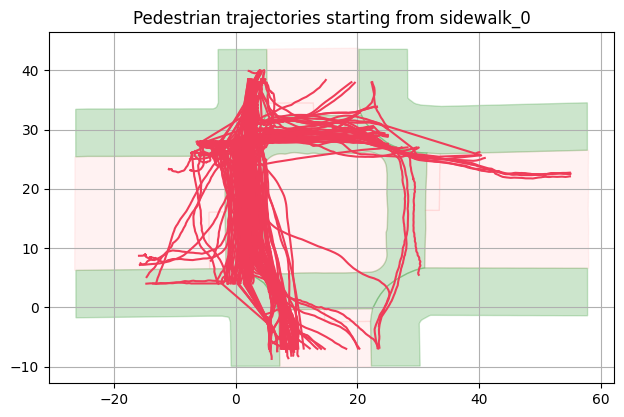

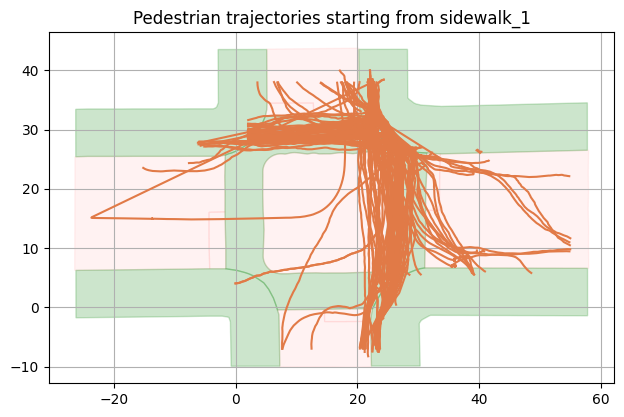

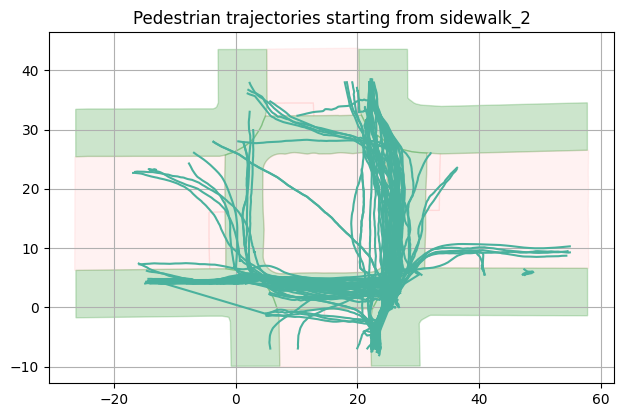

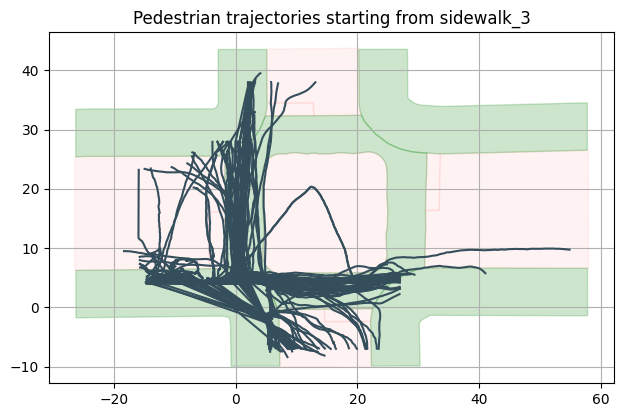

In [7]:

for sidewalk_id, pedestrian_ids in trajectories_per_sidewalk.items():
    # Gather pedestrian data for this sidewalk
    sidewalk_pedestrian_data = {pid: sind.pedestrian_data[pid] for pid in pedestrian_ids}

    # Plot the data for this sidewalk
    plot = plot_dataset(sind=sind, pedestrian_data=sidewalk_pedestrian_data, color=COLOR_PALETE[sidewalk_id], title=f'sidewalk_{sidewalk_id}')

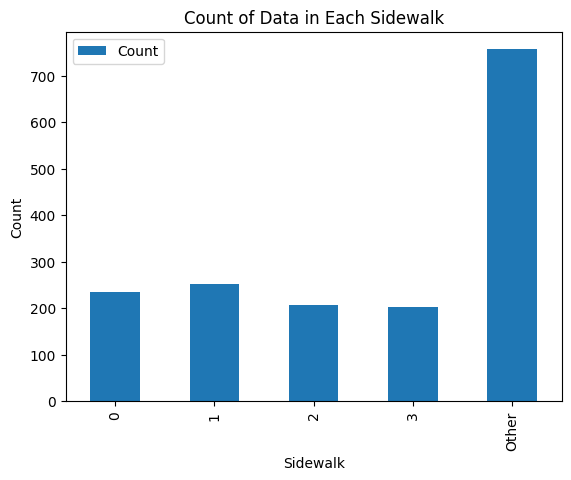

In [8]:
import matplotlib.pyplot as plt

# Create a bar plot
counts = {str(key): len(value) for key, value in trajectories_per_sidewalk.items()}
df = pd.DataFrame(list(counts.items()), columns=['Key', 'Count'])
df.loc[len(df.index)] = ['Other', len(sind.pedestrian_data) - df['Count'].sum()]

df.set_index('Key').plot(kind='bar')

# Add labels and title (optional)
plt.xlabel('Sidewalk')
plt.ylabel('Count')
plt.title('Count of Data in Each Sidewalk')

# Show the plot
plt.show()

### FLIP IMAGES

In [9]:
images = []
for sid in range(0, 4):
    images.append(Image.open(f'sidewalk_{sid}.png'))


In [10]:
rotated_1 = images[1].rotate(90)   # Rotate by -45 degrees
rotated_2 = images[2].rotate(180)   # Rotate by -90 degrees
rotated_3 = images[3].rotate(-90)   # Rotate by 45 degrees (or -45 degrees counter-clockwise)

In [11]:
total_width = images[0].width + rotated_1.width + rotated_2.width + rotated_3.width
max_height = max(images[0].height, rotated_1.height, rotated_2.height, rotated_3.height)

total_height  = images[0].height + rotated_1.height + rotated_2.height + rotated_3.height
max_width  = max(images[0].width, rotated_1.width, rotated_2.width, rotated_3.width)

merged_image = Image.new('RGB', (total_width, max_height))

In [12]:
x_offset = 0
for im in [images[0], rotated_1, rotated_2, rotated_3]:
    merged_image.paste(im, (x_offset, 0))
    x_offset += im.width

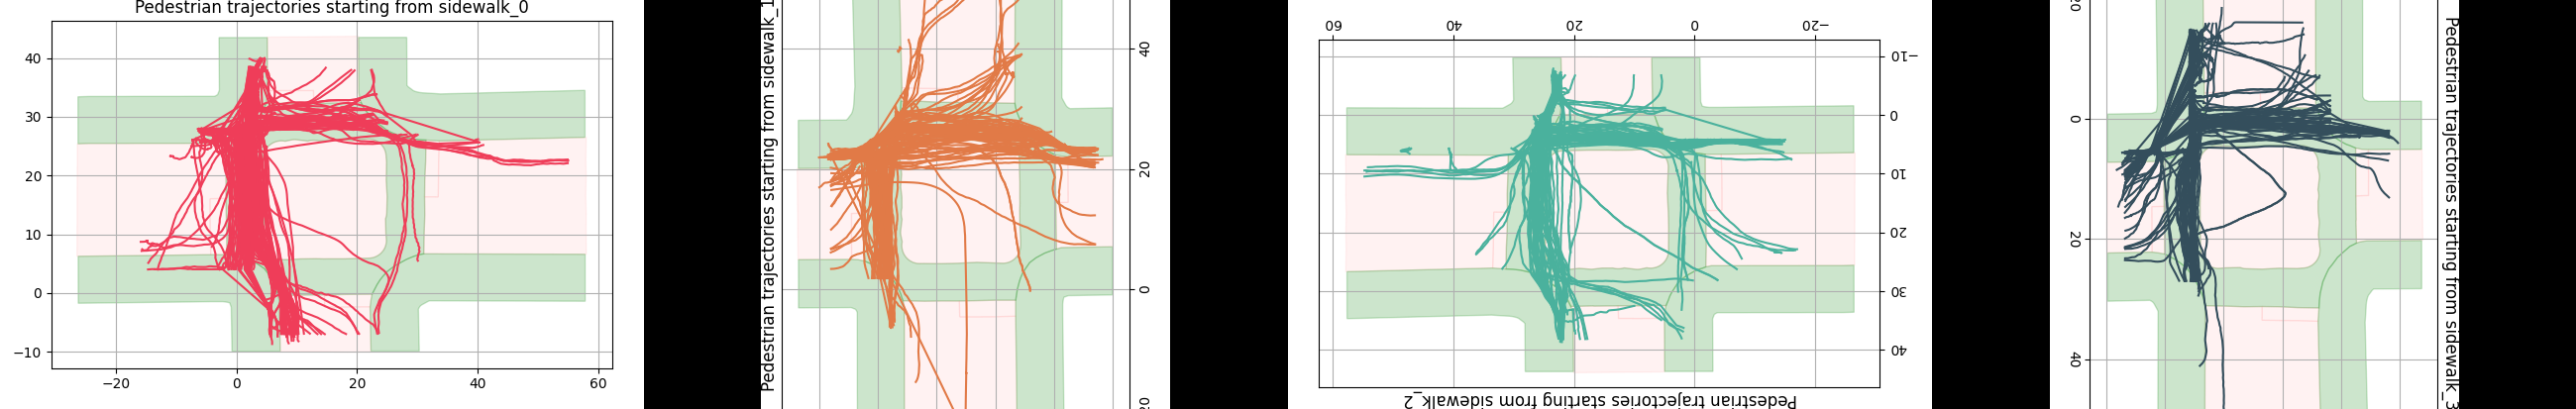

In [13]:
merged_image.show()  # To display the merged image


### Heatmaps

In [14]:
num_sidewalks = len(trajectories_per_sidewalk)

In [15]:
# Function to plot density heatmap
def plot_density_heatmap(ax, x_coords, y_coords, title, vmin, vmax):
    heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    cax = ax.imshow(heatmap.T, extent=extent, origin='lower', vmin=vmin, vmax=vmax, cmap='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')

    return cax


In [16]:
global_min = min([np.min(sind.pedestrian_data[pid]['y']) for pid in trajectories_per_sidewalk])
global_max = max([np.max(sind.pedestrian_data[pid]['y']) for pid in trajectories_per_sidewalk])

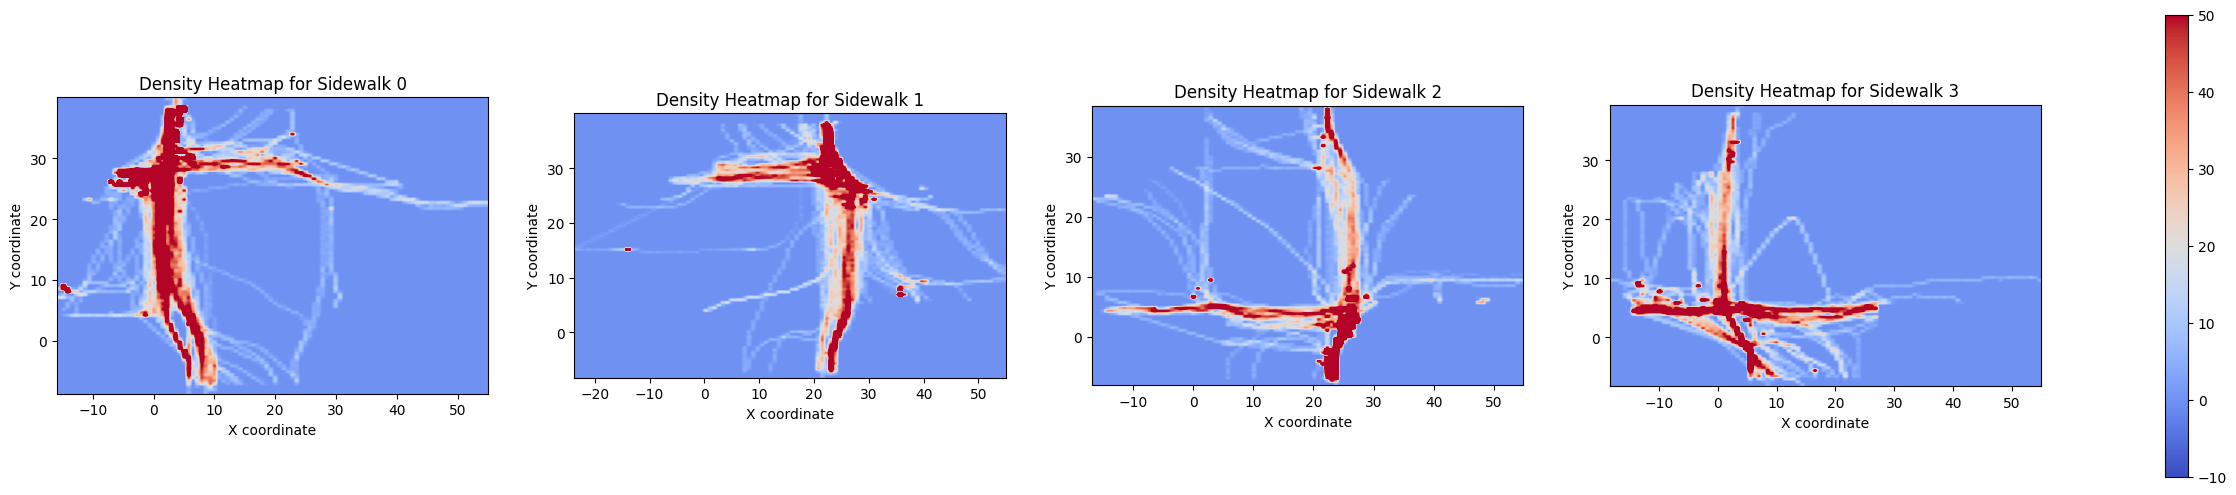

In [17]:
# Create a figure with subplots
num_rows = 1
num_cols = num_sidewalks
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

# Process data for each sidewalk
for sidewalk_id, pedestrian_ids in trajectories_per_sidewalk.items():
    x_coords, y_coords = [], []
    for pid in pedestrian_ids:
        pedestrian_data = sind.pedestrian_data.get(pid, {})
        x_coords.extend(pedestrian_data.get('x', []))
        y_coords.extend(pedestrian_data.get('y', []))
    
    ax = axs.flat[sidewalk_id]
    # Plot density heatmap for the sidewalk
    cax = plot_density_heatmap(ax, x_coords, y_coords, f'Density Heatmap for Sidewalk {sidewalk_id}', -10, 50)
    # fig.colorbar(cax, ax=ax, orientation='vertical')

fig.colorbar(cax, ax=axs.ravel().tolist(), orientation='vertical')
plt.show()

### Plot rest of the data Trajectories

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages

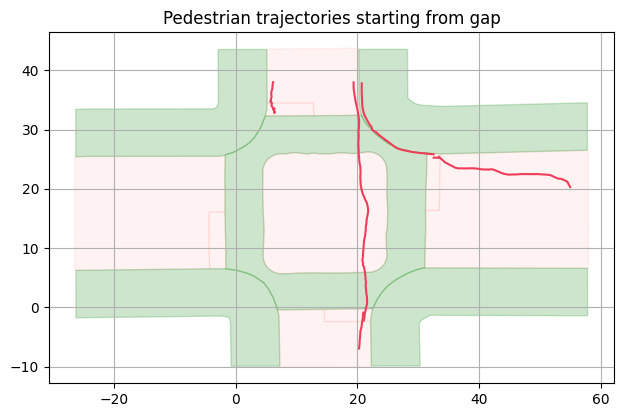

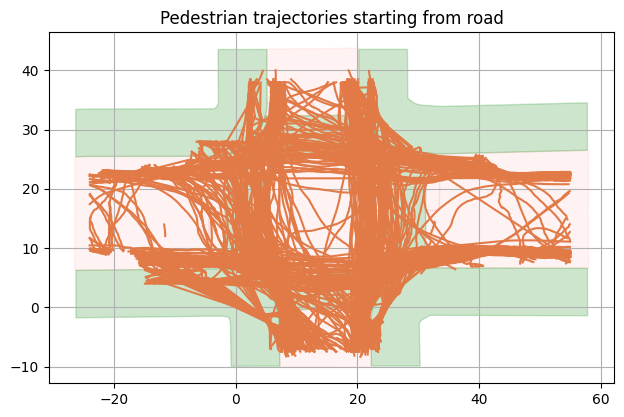

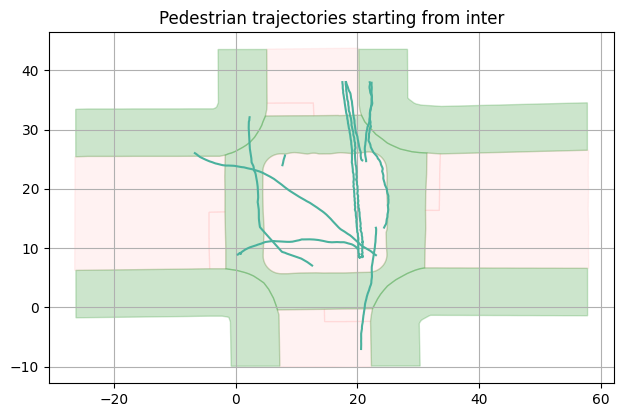

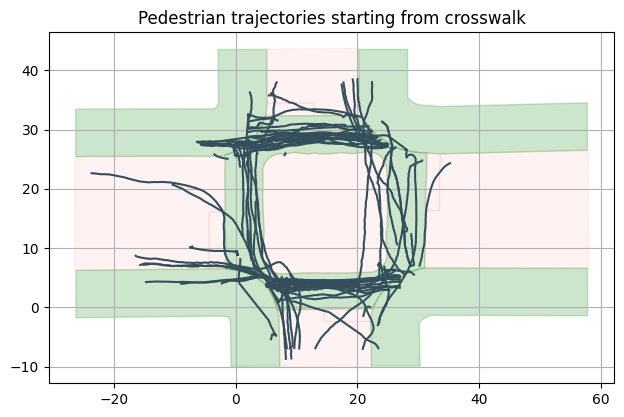

In [18]:
for idx, (key, pedestrian_ids) in enumerate(rest_trajectories.items()):
    # Gather pedestrian data for this sidewalk
    sidewalk_pedestrian_data = {pid: sind.pedestrian_data[pid] for pid in pedestrian_ids}

    # Plot the data for this sidewalk
    plot = plot_dataset(sind=sind, pedestrian_data=sidewalk_pedestrian_data, color=COLOR_PALETE[idx], title=key)

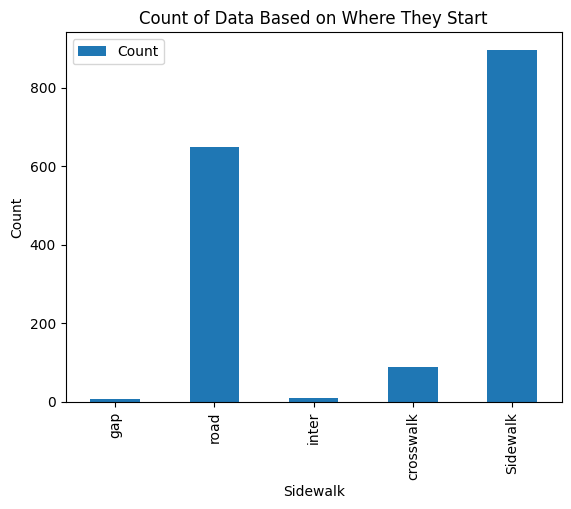

In [19]:
import matplotlib.pyplot as plt

# Create a bar plot
counts = {str(key): len(value) for key, value in rest_trajectories.items()}
df = pd.DataFrame(list(counts.items()), columns=['Key', 'Count'])
df.loc[len(df.index)] = ['Sidewalk', len(sind.pedestrian_data) - df['Count'].sum()]

df.set_index('Key').plot(kind='bar')

# Add labels and title (optional)
plt.xlabel('Sidewalk')
plt.ylabel('Count')
plt.title('Count of Data Based on Where They Start')

# Show the plot
plt.show()

### One Example

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


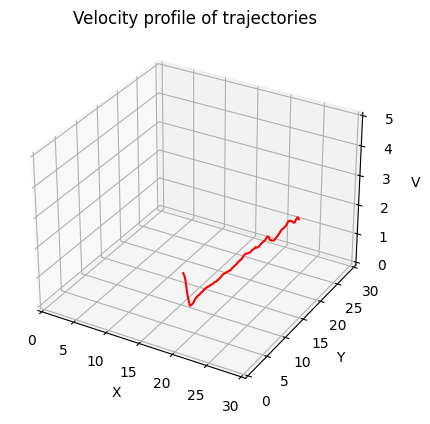

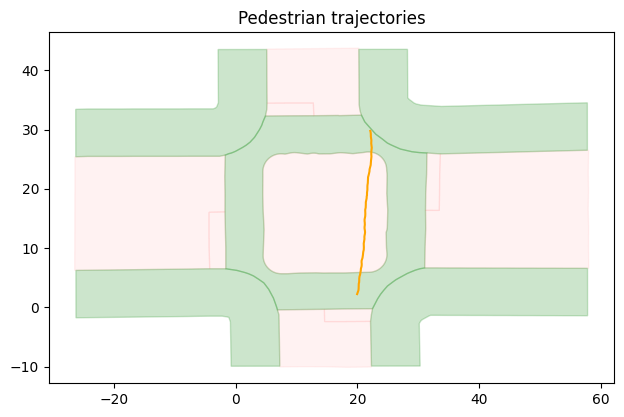

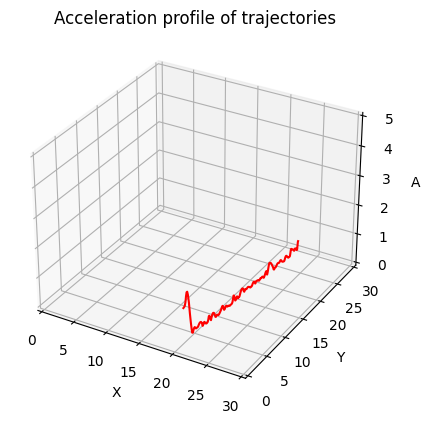

In [20]:
sind.plot_dataset(data={0: sind.pedestrian_data[0]})

# Clusters Brainstorming

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

In [22]:
_features = []

for pid, data in sind.pedestrian_data.items():
    vx, vy, ax, ay = data['vx'], data['vy'], data['ax'], data['ay']
    speed = np.sqrt(np.square(vx) + np.square(vy))
    acceleration = np.sqrt(np.square(ax) + np.square(ay))
    
    # Example: Using mean speed and acceleration as features
    mean_speed = np.mean(speed)
    mean_acceleration = np.mean(acceleration)
    _features.append([mean_speed, mean_acceleration])

_features = np.array(_features)

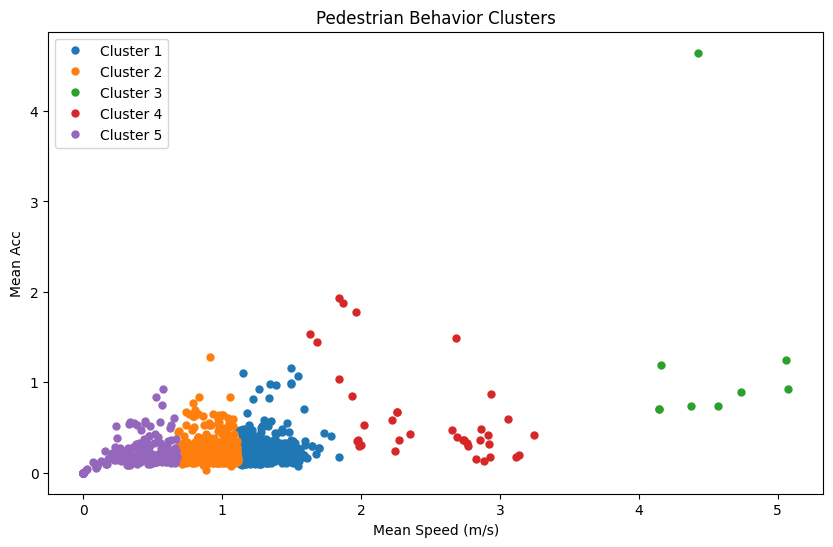

In [23]:
# Number of clusters
k = 5  # Adjust this based on your data

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(_features)
labels = kmeans.labels_
plt.figure(figsize=(10, 6))
for i in range(k):
    # Select only data points with label == i
    ds = _features[np.where(labels == i)]
    plt.plot(ds[:, 0].astype(float), ds[:, 1], 'o', markersize=5, label=f'Cluster {i+1}')

plt.xlabel('Mean Speed (m/s)')
plt.ylabel('Mean Acc')

plt.legend()
plt.title('Pedestrian Behavior Clusters')
plt.show()


In [24]:
label_encoder = LabelEncoder()

In [25]:
def check_char(point):
    char = ''
    for i in range(0, 4):
        if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):
            char = f'sidewalk{i}'

    if not point.within(map.sidewalk_poly) and not point.touches(map.sidewalk_poly):
        if point.within(map.gap_poly) or point.touches(map.gap_poly):
            char = f'gap'
        if point.within(map.road_poly) or point.touches(map.road_poly):
            char = f'road'
        if point.within(map.intersection_poly) or point.touches(map.intersection_poly):
            char = f'inter'
        if point.within(map.crosswalk_poly) or point.touches(map.crosswalk_poly):
            char = f'crosswalk'

    return char


In [26]:
def calculate_angle_between_vectors(v1, v2):
    unit_vector_1 = v1 / np.linalg.norm(v1)
    unit_vector_2 = v2 / np.linalg.norm(v2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    return angle

def calculate_direction_change(x, y):
    angles = []
    for i in range(2, len(x)):
        vec1 = [x[i-1] - x[i-2], y[i-1] - y[i-2]]
        vec2 = [x[i] - x[i-1], y[i] - y[i-1]]
        angle = calculate_angle_between_vectors(vec1, vec2)
        angles.append(angle)
    return np.nan_to_num(angles)  # Replace NaNs with 0

# Example: Calculating direction change for each pedestrian
features = []

for pid, data in sind.pedestrian_data.items():
    x, y = np.array(data['x']), np.array(data['y'])
    _trajectory_x, _trajectory_y = np.array(x), np.array(y)
    start_point = Point((_trajectory_x[0], _trajectory_y[0]))
    starting_point_char = check_char(start_point)
   
    direction_change = calculate_direction_change(x, y)
    mean_direction_change = np.mean(direction_change)
    features.append([mean_direction_change, starting_point_char])

features = np.array(features)
direction_changes = [float(feature[0]) for feature in features]
starting_points = [feature[1] for feature in features]
encoded_starting_points = label_encoder.fit_transform(starting_points)
combined_features = np.column_stack((direction_changes, encoded_starting_points))


/tmp/ipykernel_21968/3818831425.py:4: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):
/tmp/ipykernel_21968/111860155.py:5: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot_product)
/tmp/ipykernel_21968/111860155.py:2: RuntimeWarning: invalid value encountered in divide
  unit_vector_1 = v1 / np.linalg.norm(v1)
/tmp/ipykernel_21968/111860155.py:3: RuntimeWarning: invalid value encountered in divide
  unit_vector_2 = v2 / np.linalg.norm(v2)


In [27]:
# Number of clusters
k = 3  # Adjust this based on your data

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(combined_features)
labels = kmeans.labels_


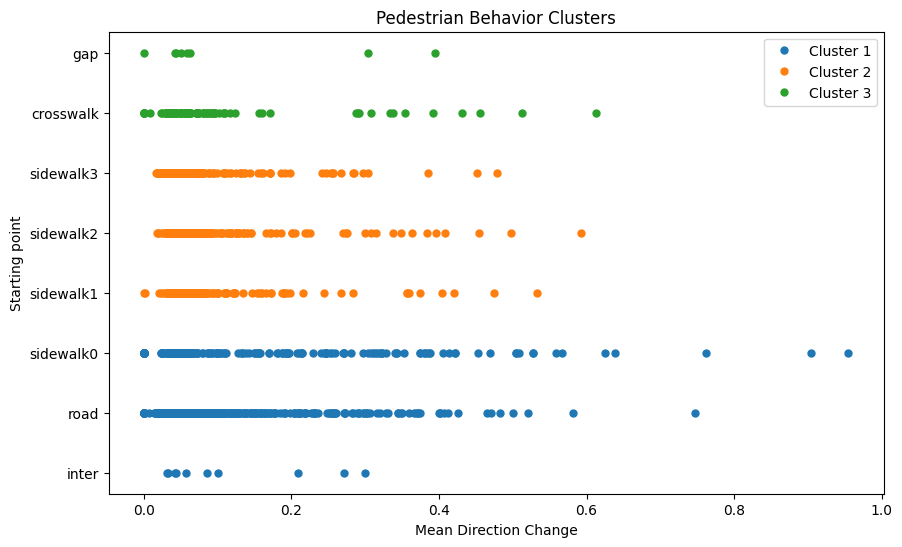

In [28]:
plt.figure(figsize=(10, 6))
for i in range(k):
    # Select only data points with label == i
    ds = features[np.where(labels == i)]
    plt.plot(ds[:, 0].astype(float), ds[:, 1], 'o', markersize=5, label=f'Cluster {i+1}')

plt.xlabel('Mean Direction Change')
plt.ylabel('Starting point')

plt.legend()
plt.title('Pedestrian Behavior Clusters')
plt.show()


### Check other ideas

In [29]:
def extract_features(data, map):
    features = []
    for pid, pdata in data.items():
        x, y = np.array(pdata['x']), np.array(pdata['y'])

        # Example feature calculations
        direction_change = calculate_direction_change(x, y)
        mean_direction_change = np.mean(direction_change)

        proximity_to_crosswalk = min([Point(x[i], y[i]).distance(map.crosswalk_poly) for i in range(len(x))])
        
        # Add more feature calculations as needed
        
        features.append([mean_direction_change, proximity_to_crosswalk])  # Add more features to this list
    return np.array(features)

# Extract features
features = extract_features(sind.pedestrian_data, map)


/tmp/ipykernel_21968/111860155.py:5: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot_product)
/tmp/ipykernel_21968/111860155.py:2: RuntimeWarning: invalid value encountered in divide
  unit_vector_1 = v1 / np.linalg.norm(v1)
/tmp/ipykernel_21968/111860155.py:3: RuntimeWarning: invalid value encountered in divide
  unit_vector_2 = v2 / np.linalg.norm(v2)


In [30]:
# Number of clusters
k = 6  # Adjust based on your analysis

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)
labels = kmeans.labels_

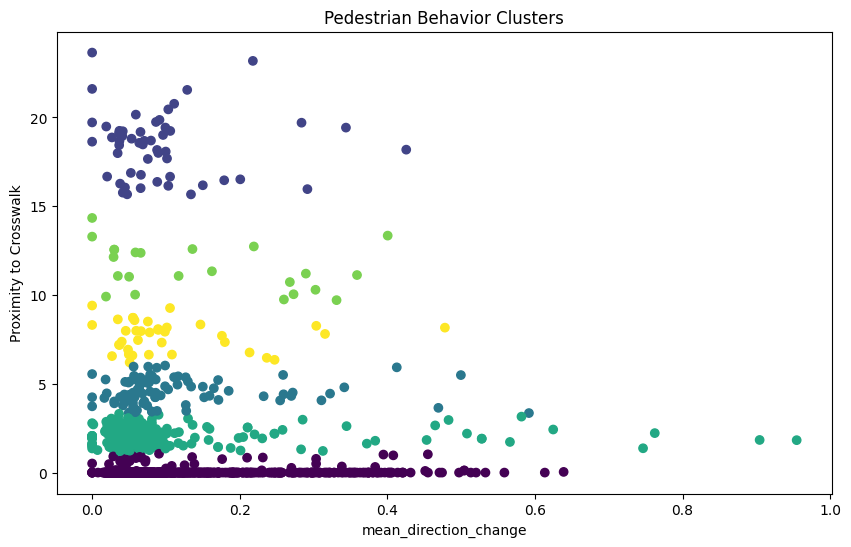

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.xlabel('mean_direction_change')
plt.ylabel('Proximity to Crosswalk')
plt.title('Pedestrian Behavior Clusters')
plt.show()

##### Other 

In [32]:
def calculate_angle_between_vectors(v1, v2):
    """Calculate the angle between two vectors."""
    unit_vector_1 = v1 / np.linalg.norm(v1)
    unit_vector_2 = v2 / np.linalg.norm(v2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(np.clip(dot_product, -1.0, 1.0))  # Clip for floating point errors
    return np.degrees(angle)  # Convert to degrees

def calculate_turning_angles(path):
    """Calculate turning angles along a path."""
    angles = []
    for i in range(1, len(path.coords) - 1):
        p0 = np.array(path.coords[i - 1])
        p1 = np.array(path.coords[i])
        p2 = np.array(path.coords[i + 1])

        vec1 = p1 - p0
        vec2 = p2 - p1

        if np.linalg.norm(vec1) == 0 or np.linalg.norm(vec2) == 0:
            continue  # Skip if either vector is zero to avoid division by zero

        angle = calculate_angle_between_vectors(vec1, vec2)
        angles.append(angle)

    return angles

In [33]:
def is_crossing_street(pedestrian_path, map):
    return pedestrian_path.intersects(map.road_poly) or pedestrian_path.intersects(map.crosswalk_poly) \
        or pedestrian_path.intersects(map.intersection_poly) or pedestrian_path.intersects(map.gap_poly)

def is_illegal_crossing(pedestrian_path, map):
    return (pedestrian_path.intersects(map.road_poly) or pedestrian_path.intersects(map.intersection_poly)) \
        and not pedestrian_path.intersects(map.crosswalk_poly)

def has_made_turn(pedestrian_path, angle_threshold=30):
    # Assuming pedestrian_path is a LineString
    # Calculate the turning angles along the path
    angles = calculate_turning_angles(pedestrian_path)
    return any(angle > angle_threshold for angle in angles)
    # direction_change = calculate_direction_change(x, y)
    # mean_direction_change = np.mean(direction_change)
    # return mean_direction_change

# Example: Processing each pedestrian
features = []

for pid, data in sind.pedestrian_data.items():
    x, y = np.array(data['x']), np.array(data['y'])
    pedestrian_path = LineString(zip(x, y))
    
    crossing_feature = is_crossing_street(pedestrian_path, map)
    illegal_crossing_feature = is_illegal_crossing(pedestrian_path, map)
    turn_feature = has_made_turn(pedestrian_path)

    features.append([crossing_feature, illegal_crossing_feature, turn_feature])

# Convert features to NumPy array for clustering
features = np.array(features)


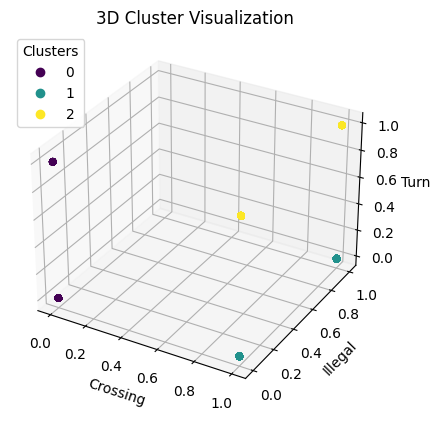

In [34]:
# Sample data - replace these with your actual features
feature1 = np.array([f[0] for f in features])  # E.g., Crossing
feature2 = np.array([f[1] for f in features])  # E.g., Illegal crossing flag
feature3 = np.array([f[2] for f in features])  # E.g., Turn

# Clustering (you might have already done this)
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
labels = kmeans.labels_

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(feature1, feature2, feature3, c=labels, cmap='viridis')

# Labeling axes
ax.set_xlabel('Crossing')
ax.set_ylabel('Illegal')
ax.set_zlabel('Turn')

# Legend and title
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.title('3D Cluster Visualization')

plt.show()


# Create Dataframe

In [35]:
sind = SinD()
map = sind.map

In [36]:
input_len = 90

In [38]:
# chunk_data = sind.data(input_len=input_len)
pedestrian_data = sind.pedestrian_data

In [39]:

def calculate_angle_between_vectors(v1, v2):
    # Convert the input lists to NumPy arrays if they aren't already
    v1, v2 = np.array(v1), np.array(v2)

    # Calculate the dot product
    dot_product = np.dot(v1, v2)

    # Calculate the norms of each vector
    norm_v1, norm_v2 = np.linalg.norm(v1), np.linalg.norm(v2)

    # Calculate the cosine of the angle
    cos_theta = dot_product / (norm_v1 * norm_v2)

    # Calculate the angle in radians and then convert to degrees
    angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip for floating point precision
    angle_deg = np.degrees(angle_rad)

    return angle_deg


def calculate_direction_change(x, y):
    angles = []
    for i in range(2, len(x)):
        vec1 = np.array([x[i-1] - x[i-2], y[i-1] - y[i-2]])
        vec2 = np.array([x[i] - x[i-1], y[i] - y[i-1]])
        angle = calculate_angle_between_vectors(vec1, vec2)
        angles.append(angle)
    return np.nan_to_num(angles)  # Replace NaNs with 0


def is_crossing_street(pedestrian_path, map):
    return pedestrian_path.intersects(map.road_poly) or pedestrian_path.intersects(map.crosswalk_poly) \
        or pedestrian_path.intersects(map.intersection_poly) or pedestrian_path.intersects(map.gap_poly)


def is_illegal_crossing(pedestrian_path, map):
    return (pedestrian_path.intersects(map.road_poly) or pedestrian_path.intersects(map.intersection_poly))


def has_made_turn(x, y, angle_threshold=30):
    # Calculate if direction has changed between the first and last point more than threshold (degrees)
    # return any(angle > angle_threshold for angle in angles)
    start_vector = np.array([x[1] - x[0], y[1] - y[0]])
    end_vector = np.array([x[-1] - x[-2], y[-1] - y[-2]])

    angle = calculate_angle_between_vectors(start_vector, end_vector)
    return angle > 30


def check_point_location(point):
    point_location = ''
    for i in range(0, 4):
        if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):
            point_location = f'sidewalk{i}'

    if not point.within(map.sidewalk_poly) and not point.touches(map.sidewalk_poly):
        if point.within(map.gap_poly) or point.touches(map.gap_poly):
            point_location = f'gap'
        if point.within(map.road_poly) or point.touches(map.road_poly):
            point_location = f'road'
        if point.within(map.intersection_poly) or point.touches(map.intersection_poly):
            point_location = f'inter'
        if point.within(map.crosswalk_poly) or point.touches(map.crosswalk_poly):
            point_location = f'crosswalk'

    return point_location


def count_different_locations(x, y):
    data = {'sidewalk0__count': 0, 'sidewalk1__count': 0, 'sidewalk2__count': 0, 'sidewalk3__count': 0, 'gap__count': 0, 'road__count': 0,
               'inter__count': 0, 'crosswalk__count': 0, '': 0}
    for x_point, y_point in zip(x, y):
        data[check_point_location(Point(x_point, y_point)) + '__count'] +=1

    del data['']
    return data

In [40]:
def get_recorded_features(pedestrian_id, dataset, input_len):
    if type(dataset) is not dict:
        data = []
        idx = 0
        for _ in range(6):
            data.append(pd.DataFrame(dataset).iloc[pedestrian_id,:][idx:idx+input_len])
            idx += input_len
            
        x, y, vx, vy, ax, ay = data[0].to_numpy(), data[1].to_numpy(), \
            data[2].to_numpy(), data[3].to_numpy(), data[4].to_numpy(), data[5].to_numpy()

    else:    
        x, y, vx, vy, ax, ay = dataset[pedestrian_id]['x'].to_numpy(), dataset[pedestrian_id]['y'].to_numpy(), \
            dataset[pedestrian_id]['vx'].to_numpy(), dataset[pedestrian_id]['vy'].to_numpy(), dataset[pedestrian_id]['ax'].to_numpy(), dataset[pedestrian_id]['ay'].to_numpy()

    return  x, y, vx, vy, ax, ay

In [41]:
def create_dataframe(dataset, input_len=90):
    df = pd.DataFrame()
    for pedestrian_id in range(len(dataset)):
        x, y, vx, vy, ax, ay = get_recorded_features(pedestrian_id, dataset, input_len)

        speed = pd.DataFrame(np.sqrt(np.square(vx) + np.square(vy)))
        acceleration = pd.DataFrame(np.sqrt(np.square(ax) + np.square(ay)))
        direction_change = pd.DataFrame(calculate_direction_change(x, y))

        proximity_to_crosswalk__start = Point(x[0], y[0]).distance(map.crosswalk_poly)
        proximity_to_crosswalk__last = Point(x[-1], y[-1]).distance(map.crosswalk_poly)

        proximity_to_road__start = Point(x[0], y[0]).distance(map.road_poly)
        proximity_to_road__last = Point(x[-1], y[-1]).distance(map.road_poly)
        proximity_to_road__min = min([Point(x[i], y[i]).distance(map.road_poly) for i in range(len(x))])

        proximity_to_inter__start = Point(x[0], y[0]).distance(map.intersection_poly)
        proximity_to_inter__last = Point(x[-1], y[-1]).distance(map.intersection_poly)
        proximity_to_inter__min = min([Point(x[i], y[i]).distance(map.intersection_poly) for i in range(len(x))])

        pedestrian_path = LineString(zip(x, y))
        crossing_feature = is_crossing_street(pedestrian_path, map)
        illegal_crossing_feature = is_illegal_crossing(pedestrian_path, map)
        turn_feature = has_made_turn(x, y)
        
        # acceleration
        new_row_data = {}
        new_row_data['acc__min'] = acceleration.min()[0]
        new_row_data['acc__max'] = acceleration.max()[0]
        new_row_data['acc__avg'] = acceleration.mean()[0]
        new_row_data['acc__median'] = acceleration.quantile(.5)[0]
        new_row_data['acc__first_quantile'] = acceleration.quantile(.25)[0]
        new_row_data['acc__last_quantile'] = acceleration.quantile(.75)[0]
        new_row_data['acc__start'] = acceleration.iloc[0][0]
        new_row_data['acc__last'] = acceleration.iloc[-1][0]

        # speed
        new_row_data['speed__min'] = speed.min()[0]
        new_row_data['speed__max'] = speed.max()[0]
        new_row_data['speed__avg'] = speed.mean()[0]
        new_row_data['speed__median'] = speed.quantile(.5)[0]
        new_row_data['speed__first_quantile'] = speed.quantile(.25)[0]
        new_row_data['speed__last_quantile'] = speed.quantile(.75)[0]
        new_row_data['speed__start'] = speed.iloc[0][0]
        new_row_data['speed__last'] = speed.iloc[-1][0]

        # direction change
        new_row_data['direction_change__min'] = direction_change.min()[0]
        new_row_data['direction_change__max'] = direction_change.max()[0]
        new_row_data['direction_change__avg'] = direction_change.mean()[0]
        new_row_data['direction_change__median'] = direction_change.quantile(.5)[0]
        new_row_data['direction_change__first_quantile'] = direction_change.quantile(.25)[0]
        new_row_data['direction_change__last_quantile'] = speed.quantile(.75)[0]
        new_row_data['direction_change__start'] = direction_change.iloc[0][0]
        new_row_data['direction_change__last'] = direction_change.iloc[-1][0]

        # proximity_to_crosswalk
        new_row_data['proximity_to_crosswalk__start'] = proximity_to_crosswalk__start
        new_row_data['proximity_to_crosswalk__last'] = proximity_to_crosswalk__last

        # proximity_to_road
        new_row_data['proximity_to_road__start'] = proximity_to_road__start
        new_row_data['proximity_to_road__last'] = proximity_to_road__last
        new_row_data['proximity_to_road__min'] = proximity_to_road__min

        # proximity_to_intersection
        new_row_data['proximity_to_inter__start'] = proximity_to_inter__start
        new_row_data['proximity_to_inter__last'] = proximity_to_inter__last
        new_row_data['proximity_to_inter__min'] = proximity_to_inter__min

        # Action Features
        new_row_data['crossing'] = crossing_feature
        new_row_data['illegal_crossing'] = illegal_crossing_feature
        new_row_data['turning'] = turn_feature

        # Starting Point Feature
        new_row_data['starting_point'] = check_point_location(Point(x[0], y[0])) + '__start'
        new_row_data['ending_point'] = check_point_location(Point(x[-1], y[-1])) + '__end'
        new_row_data.update( count_different_locations(x, y))

        new_row_df = pd.DataFrame([new_row_data])
        df = pd.concat([df, new_row_df], ignore_index=True)

        if pedestrian_id == 2: break
    
    return df

##### Chunk without overlaping

In [42]:
def get_data_where_pedestrians_move(attributes, threshold: float = 0.5, velocity_filter: bool = True):
    v = np.linalg.norm(list(zip(attributes['vx'], attributes['vy'])), axis=1)
    _id = np.where(v >= threshold) if velocity_filter else np.where(v >= -1) # make sure pedestrians are moving
    new_attributes = {}

    for key in attributes.keys():
        new_attributes[key] = attributes[key].iloc[_id]

    return new_attributes


def split_pedestrian_data(data, remove_staionary_data: bool = False, chunk_size: float =90):
    """
    Split pedestrian data into chunks.

    :param data: Dictionary of pedestrian data.
    :param chunk_size: Maximum number of steps in each chunk.
    :return: Dictionary with split data.
    """
    split_data = {}
    idx = 0
    for _, attributes in data.items():
        # Determine the number of chunks needed for this pedestrian
        new_attributes = attributes
        if remove_staionary_data:
            new_attributes = get_data_where_pedestrians_move(attributes)

        extra_data = len(new_attributes['x']) % chunk_size
        flag_extra_data = extra_data > 5
        num_chunks = len(new_attributes['x']) // chunk_size + (1 if flag_extra_data else 0)

        for i in range(num_chunks):
            split_data[idx] = {}
            max_size = chunk_size + (extra_data if ((not flag_extra_data) and (i == num_chunks-1)) else 0)
            for attr, values in new_attributes.items():
                start_index = i * chunk_size
                end_index = start_index + max_size
                split_data[idx][attr] = values[start_index:end_index]
            
            idx += 1

    return split_data

In [43]:
split_data = split_pedestrian_data(pedestrian_data, remove_staionary_data=False, chunk_size=5)
df = create_dataframe(split_data)
df

/tmp/ipykernel_21968/3564067625.py:53: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):
/tmp/ipykernel_21968/3564067625.py:53: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):
/tmp/ipykernel_21968/3564067625.py:53: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):


acc__min  acc__max  acc__avg  acc__median  acc__first_quantile  \
0  1.096241  1.573824  1.302794     1.263943             1.135727   
1  1.054421  1.581903  1.321279     1.319706             1.179660   
2  0.283778  0.925272  0.602745     0.601796             0.428279   

   acc__last_quantile  acc__start  acc__last  speed__min  speed__max  ...  \
0            1.444237    1.096241   1.573824    1.684450    2.254853  ...   
1            1.470704    1.581903   1.054421    1.142229    1.526820  ...   
2            0.774598    0.925272   0.283778    1.022547    1.085348  ...   

     starting_point    ending_point  sidewalk0__count  sidewalk1__count  \
0  crosswalk__start  crosswalk__end                 0                 0   
1  crosswalk__start  crosswalk__end                 0                 0   
2  crosswalk__start  crosswalk__end                 0                 0   

   sidewalk2__count  sidewalk3__count  gap__count  road__count  inter__count  \
0                 0                 0           0            0             0   
1                 0                 0           0            0             0   
2                 0                 0           0            0             0   

   crosswalk__count  
0                 5  
1                 5  
2                 5  

[3 rows x 45 columns]

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


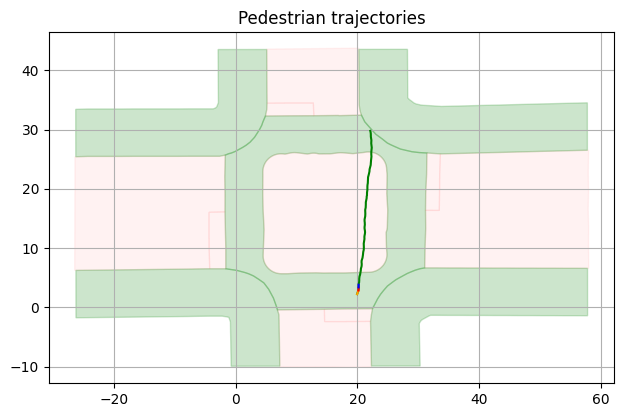

In [44]:
ax2 = map.plot_areas(alpha=0.2)[0] 
ax2.plot(np.array(pedestrian_data[0]['x']), np.array(pedestrian_data[0]['y']), c="green"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[0]['x']), np.array(split_data[0]['y']), c="orange"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[1]['x']), np.array(split_data[1]['y']), c="red"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[2]['x']), np.array(split_data[2]['y']), c="blue"), ax2.set_title("Pedestrian trajectories")

plt.grid()
plt.show()

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


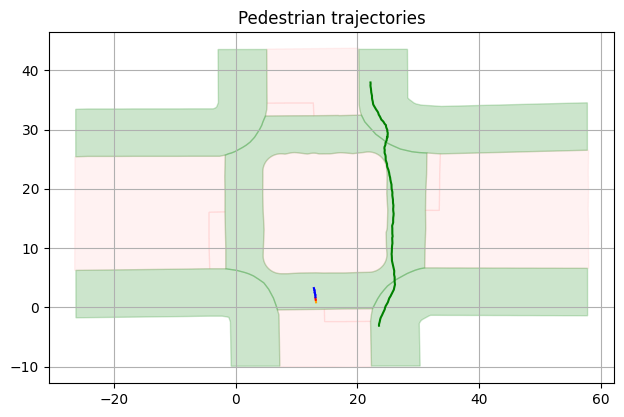

In [45]:
ax2 = map.plot_areas(alpha=0.2)[0] 
ax2.plot(np.array(pedestrian_data[24]['x']), np.array(pedestrian_data[24]['y']), c="green"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[93]['x']), np.array(split_data[93]['y']), c="orange"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[94]['x']), np.array(split_data[94]['y']), c="red"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[95]['x']), np.array(split_data[95]['y']), c="blue"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[96]['x']), np.array(split_data[96]['y']), c="blue"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[97]['x']), np.array(split_data[97]['y']), c="blue"), ax2.set_title("Pedestrian trajectories")
ax2.plot(np.array(split_data[98]['x']), np.array(split_data[98]['y']), c="blue"), ax2.set_title("Pedestrian trajectories")

plt.grid()
plt.show()

##### Chunk Data

In [49]:
pd.set_option('display.max_columns', None)
# df_chunked = create_dataframe(chunk_data)
# df_chunked

In [50]:
# df.to_csv('dataset_created_test.csv', encoding='utf-8', index=False)

##### Full Trajectories

In [51]:
df_full = create_dataframe(pedestrian_data)
df_full

/tmp/ipykernel_21968/3564067625.py:53: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):
/tmp/ipykernel_21968/3564067625.py:53: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):
/tmp/ipykernel_21968/3564067625.py:53: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if point.within(map.sidewalk_poly[i]) or point.touches(map.sidewalk_poly[i]):


acc__min  acc__max  acc__avg  acc__median  acc__first_quantile  \
0  0.012445  1.581903  0.194399     0.121054             0.079720   
1  0.006723  0.471089  0.143279     0.133704             0.067911   
2  0.005374  0.596297  0.124349     0.097708             0.065055   

   acc__last_quantile  acc__start  acc__last  speed__min  speed__max  \
0            0.195477    1.096241   0.277486    1.022547    2.254853   
1            0.184536    0.300746   0.082286    1.091998    1.303416   
2            0.153471    0.332091   0.228345    0.016348    1.344773   

   speed__avg  speed__median  speed__first_quantile  speed__last_quantile  \
0    1.260942       1.264751               1.196046              1.299346   
1    1.204872       1.214066               1.184667              1.231556   
2    0.716498       0.762654               0.688708              0.801736   

   speed__start  speed__last  direction_change__min  direction_change__max  \
0      2.254853     1.052394               0.055434              18.836978   
1      1.091998     1.268076               0.015922               9.905758   
2      1.344773     0.763691               0.005892             179.597043   

   direction_change__avg  direction_change__median  \
0               3.586268                  3.128355   
1               2.525091                  2.083902   
2               5.423564                  3.481664   

   direction_change__first_quantile  direction_change__last_quantile  \
0                          1.770716                         1.299346   
1                          1.037033                         1.231556   
2                          1.585971                         0.801736   

   direction_change__start  direction_change__last  \
0                 3.978263                1.158529   
1                 9.905758                0.742233   
2                 5.348260                1.588855   

   proximity_to_crosswalk__start  proximity_to_crosswalk__last  \
0                       0.000000                      0.000000   
1                       1.839419                      6.781763   
2                       5.259997                      5.683235   

   proximity_to_road__start  proximity_to_road__last  proximity_to_road__min  \
0                  4.617916                 3.027516                3.027516   
1                  8.187568                 0.000000                0.000000   
2                  0.000000                 0.000000                0.000000   

   proximity_to_inter__start  proximity_to_inter__last  \
0                   3.634793                  3.559178   
1                   0.000000                 12.906273   
2                  11.405376                 12.109384   

   proximity_to_inter__min  crossing  illegal_crossing  turning  \
0                      0.0      True              True     True   
1                      0.0      True              True    False   
2                      0.0      True              True    False   

     starting_point    ending_point  sidewalk0__count  sidewalk1__count  \
0  crosswalk__start  crosswalk__end                 0                 0   
1      inter__start       road__end                 0                 0   
2       road__start       road__end                 0                 0   

   sidewalk2__count  sidewalk3__count  gap__count  road__count  inter__count  \
0                 0                 0           0            0           161   
1                 0                 0          19           38            64   
2                 0                 0          27          112           321   

   crosswalk__count  
0                63  
1                51  
2               167

In [52]:
# df_full.to_csv('dataset_created__full_test.csv', encoding='utf-8', index=False)

##### Test Rotation Vector

In [53]:
def rotate_vector(v, angle_degrees):
    # Convert angle to radians
    theta = np.radians(angle_degrees)

    # Rotation matrix
    r = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

    # Rotated vector
    return np.dot(r, v)


# Original vector components
x, y = np.array(pedestrian_data[0]['x']), np.array(pedestrian_data[0]['y'])
original_vector = np.array([x, y])

# Rotate by 45 degrees
rotated_vector = rotate_vector(original_vector, 90)

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


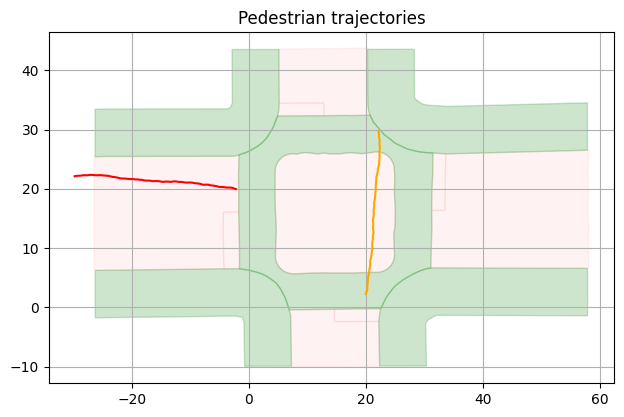

In [54]:
_x, _y = np.array(pedestrian_data[0]['x']), np.array(pedestrian_data[0]['y'])
ax2 = map.plot_areas(alpha=0.2)[0] 
ax2.plot(_x, _y, c="orange"), ax2.set_title("Pedestrian trajectories")
ax2.plot(rotated_vector[0], rotated_vector[1], c="red")
plt.grid()
plt.show()

In [55]:
# Example points defining the vectors
v1 = np.array([original_vector[0][-1] - original_vector[0][0], original_vector[1][-1] - original_vector[1][0]]) 
v2 = np.array([rotated_vector[0][-1] - rotated_vector[0][0], rotated_vector[1][-1] - rotated_vector[1][0]]) 

# Calculate the angle
angle = calculate_angle_between_vectors(v1, v2)
print("Angle between vectors:", angle, "degrees")

Angle between vectors: 90.0 degrees


In [56]:
angles = pd.DataFrame(calculate_direction_change(original_vector[0], original_vector[1]))
any(angle > 30 for angle in angles)

False

In [57]:
x, y = original_vector[0], original_vector[1]
start_vector = np.array([x[1] - x[0], y[1] - y[0]])
end_vector = np.array([x[-1] - x[-2], y[-1] - y[-2]])

angle = calculate_angle_between_vectors(start_vector, end_vector)
angle

33.031386521080805

['crosswalk_poly', 'gap_poly', 'intersection_poly', 'road_poly', 'sidewalk_poly']
poly:  POLYGON ((16.926022989850026 32.37470159783602, 17.004023061599582 32.34149675483784, 20.670026812294964 32.43004196471985, 21.216027060698252 31.301077905264144, 22.01831333246082 30.360274443037216, 23.043456914427225 29.198105469286, 24.11317205359228 28.39012125348122, 24.893172661191784 27.7481612178233, 25.383458787749987 27.48252254675334, 26.018602187163197 27.183679025599695, 27.077174518432003 26.707743043559457, 28.982604783028364 26.2539434321716, 30.20832017471548 26.110055619390074, 31.434035571001004 26.043645718589378, 31.3783205137006 22.446457093759026, 31.233462689211592 19.258794570952745, 31.20003366196761 16.36997538983169, 31.23346188798314 13.304063835795931, 31.133175779134035 10.182810931011103, 31.066318330122158 6.663100199842754, 30.286317605525255 6.519212696018539, 29.50631687103305 6.275710734240511, 28.626030317682307 5.910457771538054, 28.158029868791346 5.70016060

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


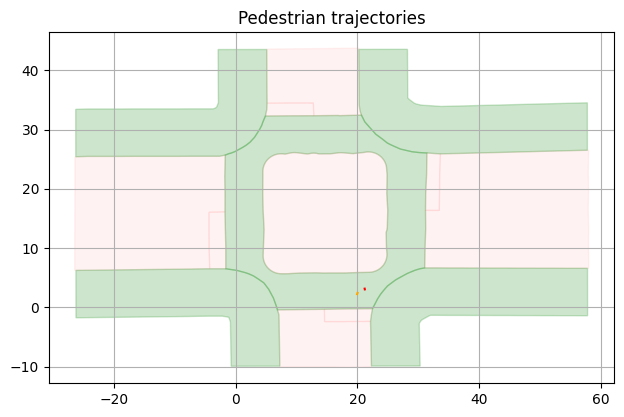

In [58]:
_x, _y = np.array(pedestrian_data[0]['x']), np.array(pedestrian_data[0]['y'])
ax2 = map.plot_areas(alpha=0.2)[0] 
ax2.plot([x[0], x[1]], [y[0], y[1]], c="orange"), ax2.set_title("Pedestrian trajectories")
ax2.plot([x[90], x[90-1]], [y[90]-10, y[90-1]-10], c="red")
plt.grid()
plt.show()

# Analyze Dataset Created

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
COLOR_PALETE = ['#EF3D59', '#E17A47', '#EFC958', '#4AB19D',  '#344E5C', '#A6206A', '#568EA6', '#A2D4AB', '#5A5050']

##### Experiment with Data

In [61]:
# check trajectories with velocity above 5.5
ids_array = []
pedestrian_data = sind.pedestrian_data
for key, data in pedestrian_data.items():
    v = np.sqrt(np.square(data['vx'] ) + np.square(data['vy'] ))
    if any(v > 5.5): ids_array.append(key)

ids_array

[130, 220, 585, 591, 850, 1284, 1626]

In [62]:
# # plot the distribution of the avg speed per trajectory (misclassification of the bikes)
# for id in ids_array:
#     v_plot = np.sqrt(np.square(pedestrian_data[id]['vx'] ) + np.square(pedestrian_data[id]['vy'] ))

#     sns.kdeplot(v_plot, shade=True)
#     plt.title('Distribution of the average speed \n (per trajectory chunk)')
#     plt.xlabel('Average Speed')
#     plt.ylabel('Density')
#     plt.grid(True)  # This adds grid lines to the axes object

# plt.show()

In [63]:
def get_number_of_clusters(chunk_size, remove_high_velocity_trajectories):
    if chunk_size == 90:
        if not remove_high_velocity_trajectories: return 16
        else: return 14
    elif chunk_size == 85:
        if not remove_high_velocity_trajectories: return 15
        else: return 14
    elif chunk_size == 80:
        if not remove_high_velocity_trajectories: return 14
        else: return 17
    elif chunk_size == 75:
        if not remove_high_velocity_trajectories: return 15
        else: return 15
    elif chunk_size == 70: # still cluster 2 for both
        if not remove_high_velocity_trajectories: return 17
        else: return 16
    elif chunk_size == 65: # still cluster 2 for both
        if not remove_high_velocity_trajectories: return 17
        else: return 12
    elif chunk_size == 60: # still cluster 2 for both
        if not remove_high_velocity_trajectories: return 18
        else: return 12
    elif chunk_size == 55: # still cluster 2 for both
        if not remove_high_velocity_trajectories: return 10
        else: return 13
    elif chunk_size == 50: # still cluster 2 for both
        if not remove_high_velocity_trajectories: return 13
        else: return 11
    elif chunk_size == 45: # still cluster 2 for both
        if not remove_high_velocity_trajectories: return 14
        else: return 12
    elif chunk_size == 40:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    elif chunk_size == 35:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    elif chunk_size == 30:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    elif chunk_size == 25:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    elif chunk_size == 20:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    elif chunk_size == 15:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    elif chunk_size == 10:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    elif chunk_size == 5:
        if not remove_high_velocity_trajectories: return 2
        else: return 2
    else:
        if not remove_high_velocity_trajectories: return 16
        else: return 15

In [66]:
# data_used, n_clusters = data_moving, 8

chunk_size = 90
remove_high_velocity_trajectories = True
data = pd.read_csv(f'../data_generated/dataset_created__full_splitted_data_{chunk_size}.csv')
data_used = data

if remove_high_velocity_trajectories:
    data = pd.read_csv(f'../data_generated/dataset_created__full_splitted_data_{chunk_size}.csv')
    pedestrian_ids_splitted_data = pd.read_csv(f'../data_generated/pedestrian_ids___full_splitted_data_{chunk_size}.csv')
    new_indeces = np.where(pedestrian_ids_splitted_data.apply(lambda row: row.isin(ids_array), axis=1))[0]
    data_used = data.drop(new_indeces)

n_clusters = get_number_of_clusters(chunk_size, remove_high_velocity_trajectories)


##### Load Data

In [ ]:
# Final Decision
chunk_size = 10
remove_high_velocity_trajectories = False
data = pd.read_csv(f'dataset_created__full_splitted_data_{chunk_size}.csv')
data_used = data

if remove_high_velocity_trajectories:
    data = pd.read_csv(f'dataset_created__full_splitted_data_{chunk_size}.csv')
    pedestrian_ids_splitted_data = pd.read_csv(f'pedestrian_ids___full_splitted_data_{chunk_size}.csv')
    new_indeces = np.where(pedestrian_ids_splitted_data.apply(lambda row: row.isin(ids_array), axis=1))[0]
    data_used = data.drop(new_indeces)

n_clusters = get_number_of_clusters(chunk_size, remove_high_velocity_trajectories)

###### Other Data

In [68]:
data_full = pd.read_csv('../data_generated/dataset_created__full.csv')
# data_full = data_full.drop(ids_array)
data_full

acc__min  acc__max  acc__avg  acc__median  acc__first_quantile  \
0     1.244515e-02  1.581903  0.194399     0.121054             0.079720   
1     6.723472e-03  0.471089  0.143279     0.133704             0.067911   
2     5.373956e-03  0.596297  0.124349     0.097708             0.065055   
3     6.952918e-03  0.735693  0.157666     0.143343             0.090265   
4     3.014776e-02  2.276081  0.578023     0.153082             0.093362   
...            ...       ...       ...          ...                  ...   
1649  1.635426e-11  0.675163  0.139664     0.106264             0.034310   
1650  5.404349e-03  0.809366  0.154622     0.128069             0.083243   
1651  1.817354e-02  0.936924  0.322357     0.233017             0.183127   
1652  1.972908e-02  1.136005  0.294788     0.242207             0.150813   
1653  2.406332e-02  1.064018  0.408958     0.321984             0.174929   

      acc__last_quantile  acc__start  acc__last  speed__min  speed__max  \
0               0.195477    1.096241   0.277486    1.022547    2.254853   
1               0.184536    0.300746   0.082286    1.091998    1.303416   
2               0.153471    0.332091   0.228345    0.016348    1.344773   
3               0.200075    0.411529   0.008900    0.525039    1.500763   
4               0.859758    1.579336   0.068126    1.156138    2.420682   
...                  ...         ...        ...         ...         ...   
1649            0.185980    0.122186   0.096831    0.022517    1.151113   
1650            0.180058    0.195004   0.356732    0.471191    1.206280   
1651            0.354599    0.642594   0.233017    0.949056    1.406011   
1652            0.382561    0.397764   0.459398    0.650831    1.830047   
1653            0.602679    0.591298   0.284682    0.044974    0.944463   

      speed__avg  speed__median  speed__first_quantile  speed__last_quantile  \
0       1.260942       1.264751               1.196046              1.299346   
1       1.204872       1.214066               1.184667              1.231556   
2       0.716498       0.762654               0.688708              0.801736   
3       0.947023       0.974237               0.917702              1.013605   
4       1.301335       1.206275               1.190930              1.233032   
...          ...            ...                    ...                   ...   
1649    0.576431       0.706959               0.226277              0.877518   
1650    1.031651       1.052648               1.002619              1.091016   
1651    1.278820       1.289643               1.243964              1.349058   
1652    1.353005       1.454640               1.236971              1.531621   
1653    0.470068       0.425946               0.159168              0.864779   

      speed__start  speed__last  direction_change__min  direction_change__max  \
0         2.254853     1.052394               0.055434              18.836978   
1         1.091998     1.268076               0.015922               9.905758   
2         1.344773     0.763691               0.005892             179.597043   
3         1.500763     0.998822               0.002242              24.078184   
4         2.420682     1.212620               0.077982              17.050878   
...            ...          ...                    ...                    ...   
1649      0.191321     1.072045               0.000000             160.058805   
1650      1.172510     1.049533               0.014733              19.192241   
1651      0.949056     1.231348               0.008349              14.482623   
1652      1.385676     1.260566               0.010316              25.457173   
1653      0.603173     0.889794               0.173120             101.356689   

      direction_change__avg  direction_change__median  \
0                  3.586268                  3.128355   
1                  2.525091                  2.083902   
2                  5.423564                  3.481664   
3                  3.703295       

In [69]:
data_moving = pd.read_csv('../data_generated/dataset_created__full_splitted_without_stationary_data.csv')
data_moving

acc__min  acc__max  acc__avg  acc__median  acc__first_quantile  \
0     0.021629  1.581903  0.278795     0.127159             0.069928   
1     0.012445  0.378176  0.129391     0.108280             0.073219   
2     0.021297  0.287837  0.154741     0.143566             0.104565   
3     0.006723  0.471089  0.163043     0.145246             0.065754   
4     0.007190  0.239212  0.121587     0.123727             0.071562   
...        ...       ...       ...          ...                  ...   
5181  0.019729  1.136005  0.455303     0.380391             0.211691   
5182  0.028458  0.483569  0.242015     0.242128             0.163372   
5183  0.023101  0.612055  0.213922     0.173410             0.090440   
5184  0.049737  0.568242  0.258683     0.224626             0.139228   
5185  0.033854  1.033840  0.342483     0.214735             0.135400   

      acc__last_quantile  acc__start  acc__last  speed__min  speed__max  \
0               0.221369    1.096241   0.232668    1.022547    2.254853   
1               0.176246    0.265333   0.224846    1.088962    1.373641   
2               0.208146    0.217362   0.277486    1.052394    1.375716   
3               0.204591    0.300746   0.106852    1.091998    1.252061   
4               0.171865    0.096521   0.082286    1.096262    1.303416   
...                  ...         ...        ...         ...         ...   
5181            0.623266    0.397764   0.256346    1.273637    1.830047   
5182            0.326580    0.310234   0.289084    0.682280    1.534771   
5183            0.329816    0.268925   0.248322    0.650831    1.543772   
5184            0.388596    0.230351   0.459398    1.260566    1.671924   
5185            0.561333    0.591298   0.284682    0.542335    0.944463   

      speed__avg  speed__median  speed__first_quantile  speed__last_quantile  \
0       1.266251       1.251093               1.214147              1.278794   
1       1.267471       1.285092               1.258025              1.306302   
2       1.236729       1.260471               1.160261              1.301956   
3       1.192601       1.203290               1.178569              1.217988   
4       1.218340       1.224652               1.199773              1.251141   
...          ...            ...                    ...                   ...   
5181    1.542229       1.516315               1.394814              1.684830   
5182    1.081197       1.041933               0.864129              1.314778   
5183    1.302678       1.451757               1.178412              1.499169   
5184    1.531540       1.532635               1.489796              1.569588   
5185    0.844854       0.892010               0.827953              0.919088   

      speed__start  speed__last  direction_change__min  direction_change__max  \
0         2.254853     1.267464               0.055434              11.269798   
1         1.262038     1.272116               0.325434              18.836978   
2         1.278922     1.052394               0.116127               7.721691   
3         1.091998     1.245732               0.030669               9.905758   
4         1.231296     1.268076               0.015922               7.376147   
...            ...          ...                    ...                    ...   
5181      1.385676     1.492642               0.019242              14.069926   
5182      1.515479     0.682280               0.010316              17.857820   
5183      0.659885     1.535894               0.070549              25.457173   
5184      1.539082     1.260566               0.129370              22.105321   
5185      0.603173     0.889794               0.173120             133.522954   

      direction_change__avg  direction_change__median  \
0                  3.957030                  3.324999   
1                  3.577552                  2.698922   
2                  3.007557                  3.167480   
3                  2.481168                  1.984568   
4                  2.

In [71]:
data = pd.read_csv('../data_generated/dataset_created__full_splitted_data_90.csv')
pedestrian_ids_splitted_data = pd.read_csv('../data_generated/pedestrian_ids___full_splitted_data_90.csv')
new_indeces = np.where(pedestrian_ids_splitted_data.apply(lambda row: row.isin(ids_array), axis=1))[0]
data = data.drop(new_indeces)
data

acc__min  acc__max  acc__avg  acc__median  acc__first_quantile  \
0     0.021629  1.581903  0.278795     0.127159             0.069928   
1     0.012445  0.378176  0.129391     0.108280             0.073219   
2     0.021297  0.287837  0.154741     0.143566             0.104565   
3     0.006723  0.471089  0.163043     0.145246             0.065754   
4     0.007190  0.239212  0.121587     0.123727             0.071562   
...        ...       ...       ...          ...                  ...   
7902  0.019729  1.136005  0.455303     0.380391             0.211691   
7903  0.028458  0.483569  0.242015     0.242128             0.163372   
7904  0.023101  0.612055  0.213922     0.173410             0.090440   
7905  0.049737  0.568242  0.258683     0.224626             0.139228   
7906  0.024063  1.064018  0.408958     0.321984             0.174929   

      acc__last_quantile  acc__start  acc__last  speed__min  speed__max  \
0               0.221369    1.096241   0.232668    1.022547    2.254853   
1               0.176246    0.265333   0.224846    1.088962    1.373641   
2               0.208146    0.217362   0.277486    1.052394    1.375716   
3               0.204591    0.300746   0.106852    1.091998    1.252061   
4               0.171865    0.096521   0.082286    1.096262    1.303416   
...                  ...         ...        ...         ...         ...   
7902            0.623266    0.397764   0.256346    1.273637    1.830047   
7903            0.326580    0.310234   0.289084    0.682280    1.534771   
7904            0.329816    0.268925   0.248322    0.650831    1.543772   
7905            0.388596    0.230351   0.459398    1.260566    1.671924   
7906            0.602679    0.591298   0.284682    0.044974    0.944463   

      speed__avg  speed__median  speed__first_quantile  speed__last_quantile  \
0       1.266251       1.251093               1.214147              1.278794   
1       1.267471       1.285092               1.258025              1.306302   
2       1.236729       1.260471               1.160261              1.301956   
3       1.192601       1.203290               1.178569              1.217988   
4       1.218340       1.224652               1.199773              1.251141   
...          ...            ...                    ...                   ...   
7902    1.542229       1.516315               1.394814              1.684830   
7903    1.081197       1.041933               0.864129              1.314778   
7904    1.302678       1.451757               1.178412              1.499169   
7905    1.531540       1.532635               1.489796              1.569588   
7906    0.470068       0.425946               0.159168              0.864779   

      speed__start  speed__last  direction_change__min  direction_change__max  \
0         2.254853     1.267464               0.055434              11.269798   
1         1.262038     1.272116               0.325434              18.836978   
2         1.278922     1.052394               0.116127               7.721691   
3         1.091998     1.245732               0.030669               9.905758   
4         1.231296     1.268076               0.015922               7.376147   
...            ...          ...                    ...                    ...   
7902      1.385676     1.492642               0.019242              14.069926   
7903      1.515479     0.682280               0.010316              17.857820   
7904      0.659885     1.535894               0.070549              25.457173   
7905      1.539082     1.260566               0.129370              22.105321   
7906      0.603173     0.889794               0.173120             101.356689   

      direction_change__avg  direction_change__median  \
0                  3.957030                  3.324999   
1                  3.577552                  2.698922   
2                  3.007557                  3.167480   
3                  2.481168                  1.984568   
4                  2.

### Check if other types of Pedestrians exist

##### Splitted Dataset

/tmp/ipykernel_21968/347361657.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["speed__avg"], shade=True)


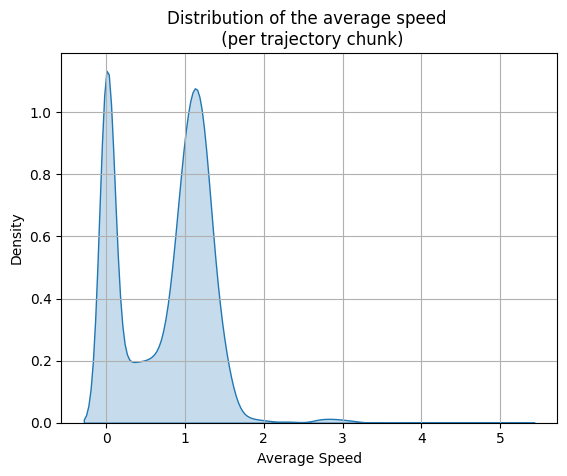

In [72]:
# plot the distribution of the avg speed per trajectory (misclassification of the bikes)
sns.kdeplot(data["speed__avg"], shade=True)
plt.title('Distribution of the average speed \n (per trajectory chunk)')
plt.xlabel('Average Speed')
plt.ylabel('Density')
plt.grid(True)  # This adds grid lines to the axes object
plt.show()

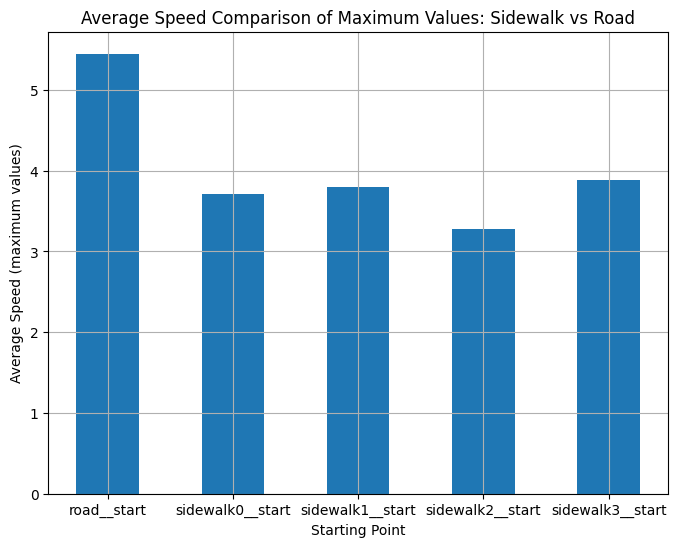

In [73]:
# compare the mean speed between the trajectories started from sidewalk vs road

filtered_data = data[data["starting_point"].isin(["sidewalk0__start", "sidewalk1__start", "sidewalk2__start", "sidewalk3__start", "road__start"])]

# # Calculate mean speeds for each starting point
mean_speeds = filtered_data.groupby('starting_point')['speed__max'].max()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_speeds.index, mean_speeds.values, width=.5)
plt.title('Average Speed Comparison of Maximum Values: Sidewalk vs Road')
plt.xlabel('Starting Point')
plt.ylabel('Average Speed (maximum values)')

plt.grid(True)  # This adds grid lines to the axes object
plt.show()

##### Dataset Full

/tmp/ipykernel_21968/3416949910.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_full["speed__avg"], shade=True)


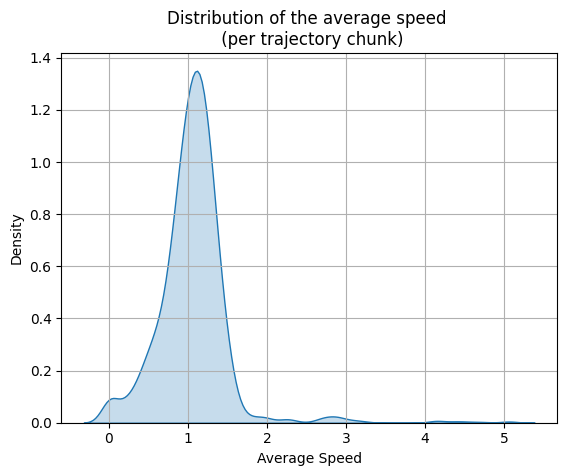

In [74]:
# plot the distribution of the avg speed per trajectory (misclassification of the bikes)
sns.kdeplot(data_full["speed__avg"], shade=True)
plt.title('Distribution of the average speed \n (per trajectory chunk)')
plt.xlabel('Average Speed')
plt.ylabel('Density')
plt.grid(True)  # This adds grid lines to the axes object
plt.show()

In [75]:
data_full["crossing"].sum() / data_full["crossing"].count() 

0.7974607013301088

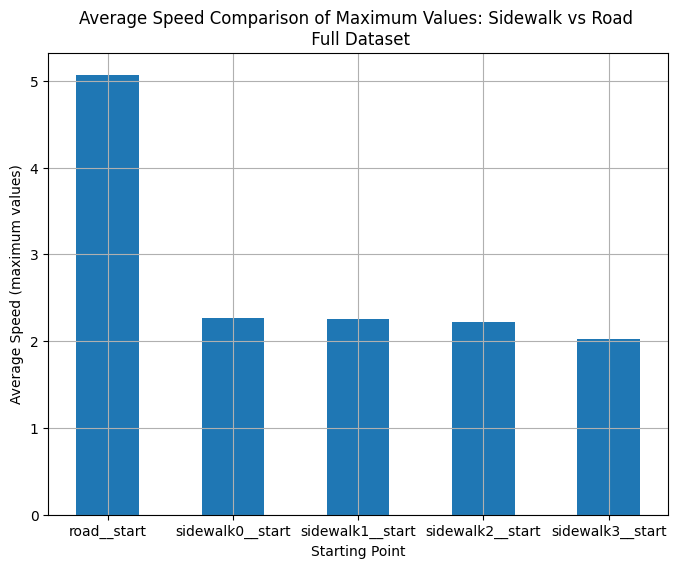

In [76]:
# compare the mean speed between the trajectories started from sidewalk vs road

filtered_data = data_full[data_full["starting_point"].isin(["sidewalk0__start", "sidewalk1__start", "sidewalk2__start", "sidewalk3__start", "road__start"])]

# # Calculate mean speeds for each starting point
mean_speeds = filtered_data.groupby('starting_point')['speed__avg'].max()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_speeds.index, mean_speeds.values, width=.5)
plt.title('Average Speed Comparison of Maximum Values: Sidewalk vs Road \n Full Dataset')
plt.xlabel('Starting Point')
plt.ylabel('Average Speed (maximum values)')

plt.grid(True)  # This adds grid lines to the axes object
plt.show()

### PCA of the created Full Dataset

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/tmp/ipykernel_21968/3185613190.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_used["speed__avg"], shade=True)


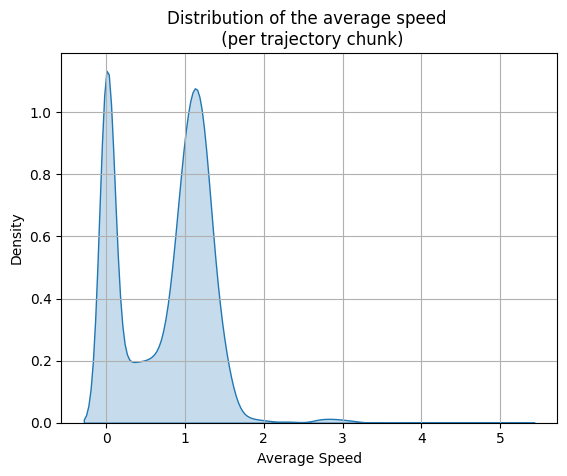

In [78]:
# plot the distribution of the avg speed per trajectory (misclassification of the bikes)
sns.kdeplot(data_used["speed__avg"], shade=True)
plt.title('Distribution of the average speed \n (per trajectory chunk)')
plt.xlabel('Average Speed')
plt.ylabel('Density')
plt.grid(True)  # This adds grid lines to the axes object
plt.show()

In [79]:
df.shape, data_used.shape, data.shape

((3, 45), (7886, 45), (7886, 45))

##### PCA plots

In [80]:
# SAME COLUMNS
df = pd.DataFrame()
# Convert 'starting_point' to one-hot encoded format
one_hot = pd.get_dummies(data_used['starting_point'])

# Join the encoded df with the original df. You can also drop the original 'starting_point' column if it's no longer needed
df = data_used.join(one_hot).drop('starting_point', axis=1)


# Convert 'ending_point' to one-hot encoded format
one_hot = pd.get_dummies(df['ending_point'])

# Join the encoded df with the original df. You can also drop the original 'starting_point' column if it's no longer needed
df = df.join(one_hot).drop('ending_point', axis=1)

In [81]:
# Standardizing the data is important because PCA is affected by the scale of the features.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [82]:
# Apply PCA

# Create a PCA instance: PCA for 2 components
pca = PCA(n_components=3)

# Fit and transform the data
principal_components = pca.fit_transform(df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components)


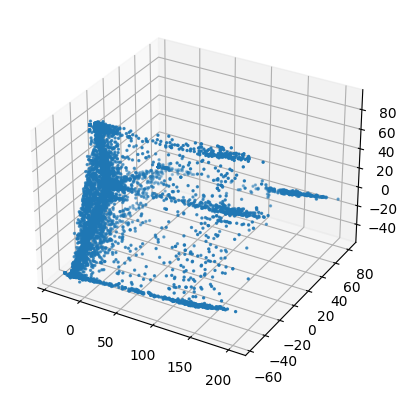

In [83]:
# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(pca_df[0], pca_df[1], pca_df[2], cmap='viridis', s=2)

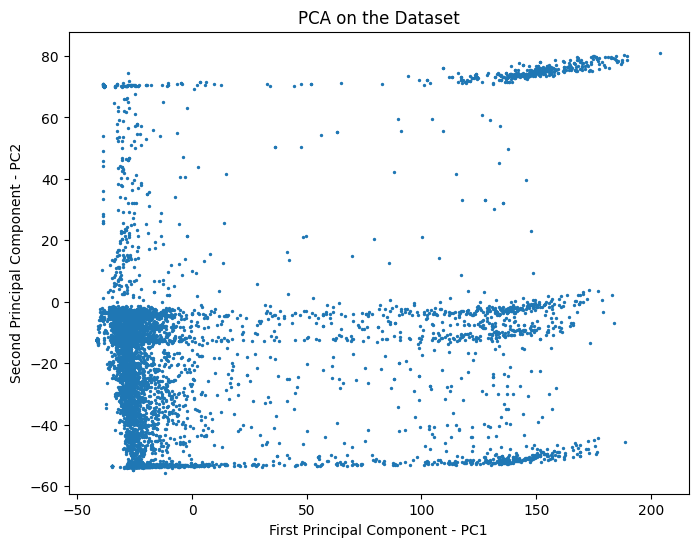

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df[0], pca_df[1], s=2)
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2')
plt.title('PCA on the Dataset')
plt.show()

### Clusters

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [86]:
pd.set_option('display.max_columns', None)

In [87]:
# SAME COLUMNS
# Convert 'starting_point' to one-hot encoded format
one_hot = pd.get_dummies(data_used['starting_point'])

# Join the encoded df with the original df. You can also drop the original 'starting_point' column if it's no longer needed
df = data_used.join(one_hot).drop('starting_point', axis=1)


# Convert 'ending_point' to one-hot encoded format
one_hot = pd.get_dummies(df['ending_point'])

# Join the encoded df with the original df. You can also drop the original 'starting_point' column if it's no longer needed
df = df.join(one_hot).drop('ending_point', axis=1)

In [88]:
# Find right number of clusters
for n_ in range(2, 26):
    kmeans = KMeans(n_clusters=n_)  # clusters
    df['cluster'] = kmeans.fit_predict(df)

    score = silhouette_score(df.iloc[:, :-1], df['cluster'])
    print("Silhouette Score: ", score, ", n_clusters:", n_)

Silhouette Score:  0.4911346069938152 , n_clusters: 2
Silhouette Score:  0.38591627367115555 , n_clusters: 3
Silhouette Score:  0.41189520881798636 , n_clusters: 4
Silhouette Score:  0.44637783253595376 , n_clusters: 5
Silhouette Score:  0.44658789009578553 , n_clusters: 6
Silhouette Score:  0.48054015488533863 , n_clusters: 7
Silhouette Score:  0.49148195969470576 , n_clusters: 8
Silhouette Score:  0.510789896074598 , n_clusters: 9
Silhouette Score:  0.5183941736187717 , n_clusters: 10
Silhouette Score:  0.5270964113423033 , n_clusters: 11
Silhouette Score:  0.5203474580055224 , n_clusters: 12
Silhouette Score:  0.5275449727930512 , n_clusters: 13
Silhouette Score:  0.5319949027979836 , n_clusters: 14
Silhouette Score:  0.5334820702259242 , n_clusters: 15
Silhouette Score:  0.5296112992763145 , n_clusters: 16
Silhouette Score:  0.5317141306390873 , n_clusters: 17
Silhouette Score:  0.49980029495743583 , n_clusters: 18
Silhouette Score:  0.5038834369037395 , n_clusters: 19
Silhouette S

In [89]:
kmeans = KMeans(n_clusters=n_clusters)  # clusters
df['cluster'] = kmeans.fit_predict(df)

score = silhouette_score(df.iloc[:, :-1], df['cluster'])
print("Silhouette Score: ", score)

Silhouette Score:  0.5318258628030829


In [91]:
centroids = kmeans.cluster_centers_
# centroids_df = pd.DataFrame(centroids, columns=df.columns[:-1])  # Assuming the last column is 'cluster'
cluster_sizes = df['cluster'].value_counts()
cluster_profiles = df.groupby('cluster').mean()

In [92]:
cluster_sizes

cluster
3     1531
0     1510
1     1180
9      952
5      468
6      384
7      365
8      323
10     313
11     253
2      196
13     184
4      120
12     107
Name: count, dtype: int64

In [93]:
cluster_profiles

acc__min  acc__max  acc__avg  acc__median  acc__first_quantile  \
cluster                                                                   
0        0.001029  0.063063  0.017341     0.012430             0.006130   
1        0.063598  0.497571  0.235803     0.218953             0.145100   
2        0.016788  0.692384  0.224328     0.177625             0.099557   
3        0.016588  0.465570  0.170631     0.147487             0.091814   
4        0.011567  0.494494  0.171765     0.138940             0.078719   
5        0.013827  0.381249  0.145259     0.127719             0.079422   
6        0.011413  0.547063  0.160004     0.116708             0.056868   
7        0.016469  0.635923  0.216760     0.171654             0.096596   
8        0.005983  0.257023  0.086852     0.069323             0.037562   
9        0.014027  0.455401  0.147754     0.121505             0.074460   
10       0.020604  0.575333  0.207156     0.176150             0.104219   
11       0.019117  0.577017  0.205125     0.172393             0.101715   
12       0.007725  0.303418  0.101700     0.080608             0.042634   
13       0.018657  0.567907  0.195943     0.157339             0.086574   

         acc__last_quantile  acc__start  acc__last  speed__min  speed__max  \
cluster                                                                      
0                  0.023116    0.029707   0.023402    0.079085    0.133427   
1                  0.308265    0.252533   0.230199    0.991784    1.317100   
2                  0.299184    0.246467   0.202008    0.032357    0.776272   
3                  0.225508    0.201168   0.166102    0.885919    1.298194   
4                  0.238109    0.190719   0.188175    0.020431    0.570483   
5                  0.194223    0.157918   0.150041    0.984356    1.312460   
6                  0.221574    0.218921   0.150932    0.856831    1.233630   
7                  0.299066    0.199462   0.216543    0.027411    0.872518   
8                  0.121886    0.087625   0.082323    0.004678    0.258399   
9                  0.188752    0.210946   0.142762    0.789981    1.119996   
10                 0.278010    0.279479   0.189830    0.874925    1.332281   
11                 0.274100    0.265024   0.207000    0.781352    1.240286   
12                 0.142895    0.100105   0.054333    0.005591    0.363470   
13                 0.270660    0.177445   0.228609    0.022544    0.703025   

         speed__avg  speed__median  speed__first_quantile  \
cluster                                                     
0          0.104266       0.104690               0.096776   
1          1.153213       1.155946               1.091892   
2          0.347408       0.337780               0.161670   
3          1.108697       1.120586               1.036837   
4          0.234560       0.189742               0.105094   
5          1.158755       1.166807               1.098799   
6          1.040664       1.041272               0.991068   
7          0.404671       0.385720               0.169410   
8          0.092168       0.065635               0.028720   
9          0.957643       0.960589               0.917164   
10         1.097455       1.097348               1.027520   
11         0.997824       0.992274               0.926695   
12         0.148283       0.123529               0.050109   
13         0.310090       0.295951               0.125044   

         speed__last_quantile  speed__start  speed__last  \
cluster                                                    
0                    0.111841      0.117448     0.095490   
1                    1.212662      1.177763     1.137230   
2                    0.506099      0.473041     0.390554   
3                    1.184758      1.087400     1.111312   
4                    0.362136      0.309788     0.250423   
5                    1.222606      1.146697     1.170209   
6                    1.089776      1.075294     1.034069   
7                    0.628872      0.38128

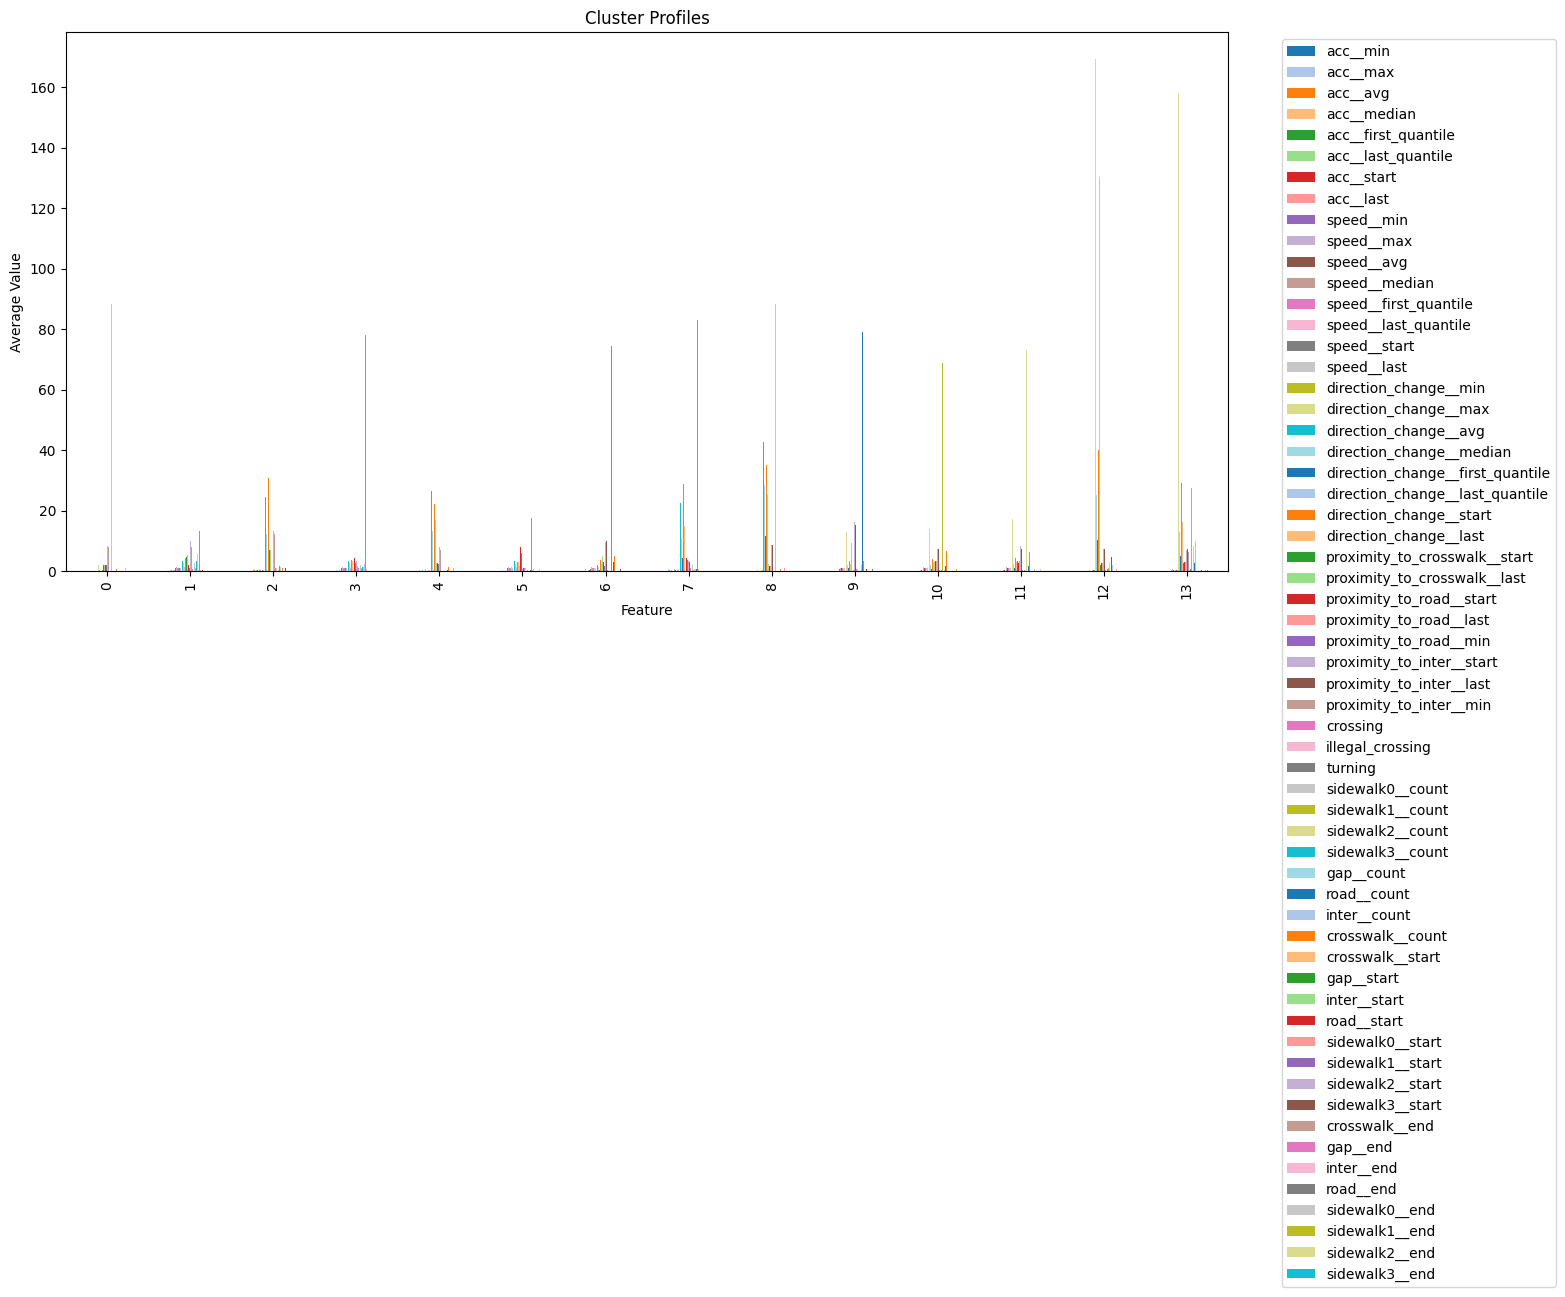

In [94]:
colormap = plt.cm.tab20.colors  # Tab20 colormap with 20 unique colors

cluster_profiles.plot(kind='bar', figsize=(15, 7), color=colormap)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Cluster Profiles")
plt.xlabel("Feature")
plt.ylabel("Average Value")
plt.show()

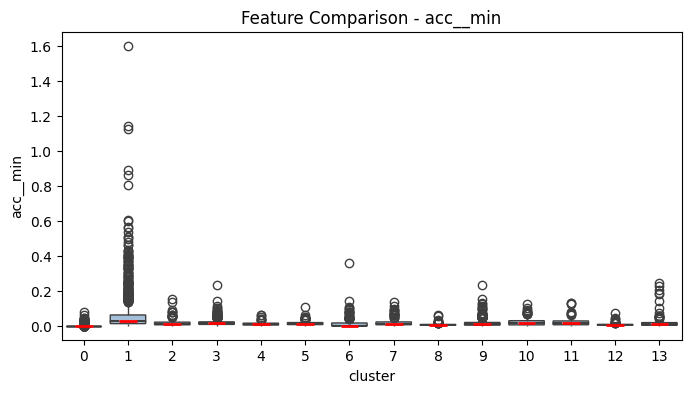

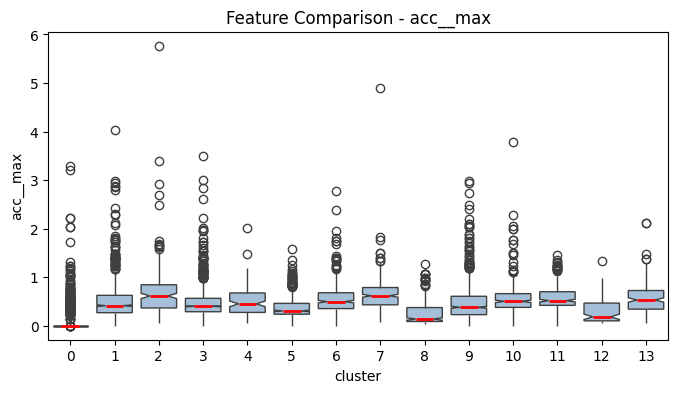

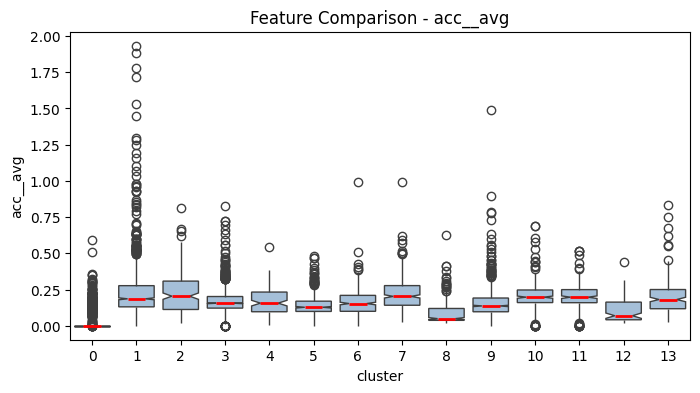

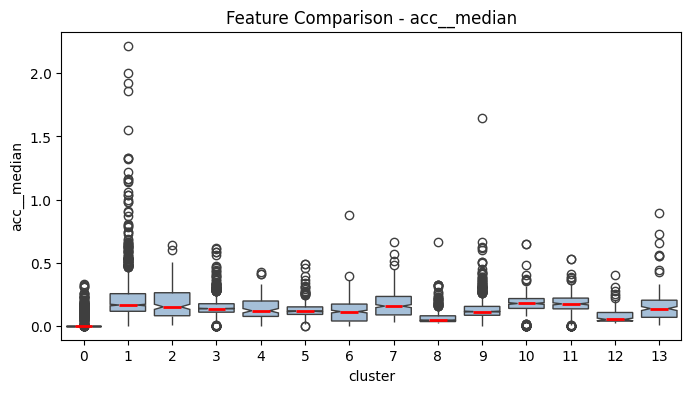

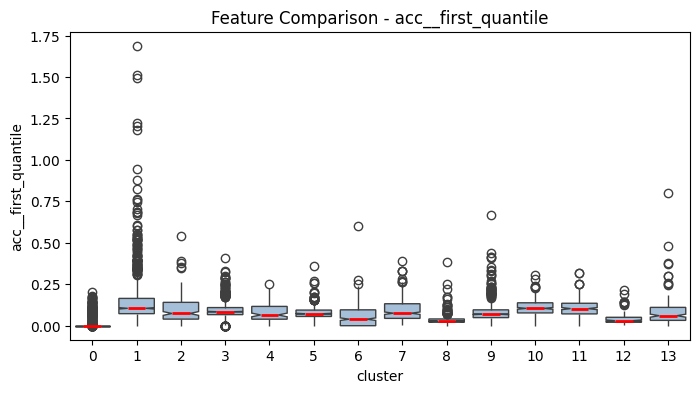

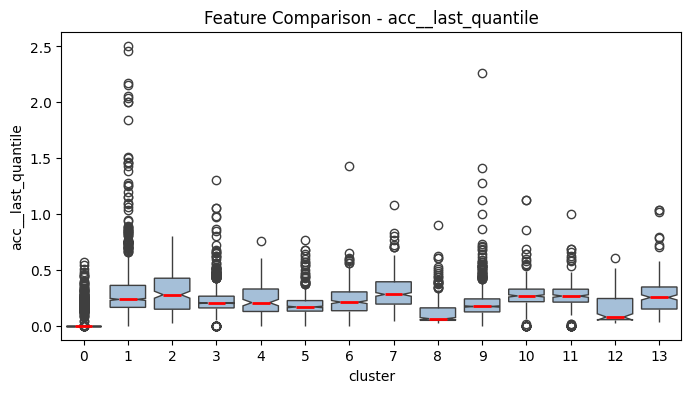

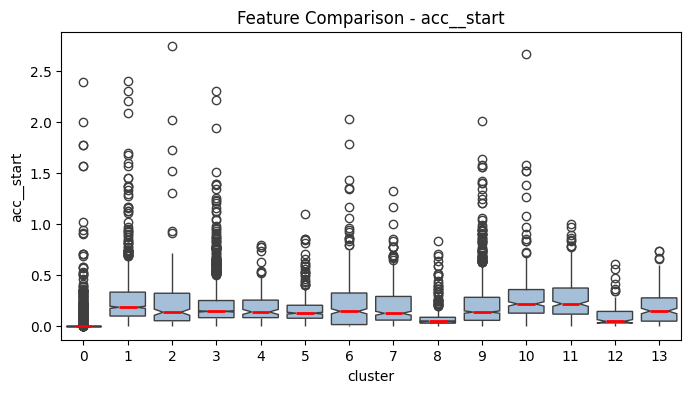

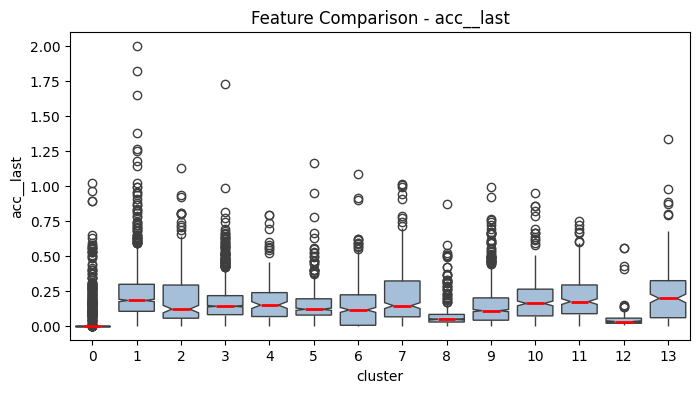

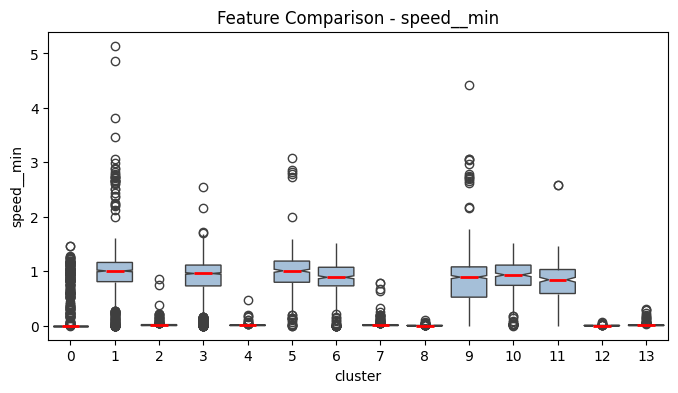

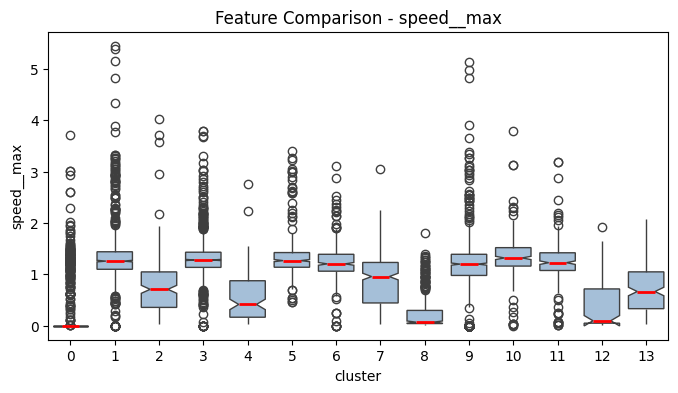

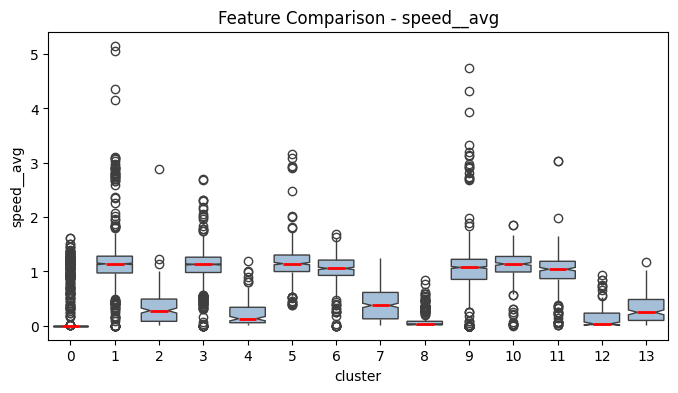

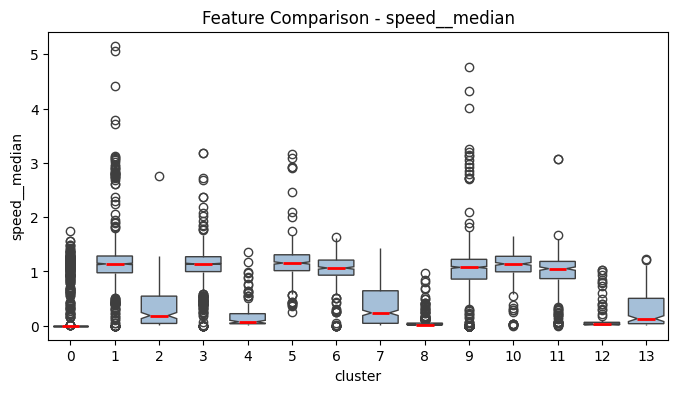

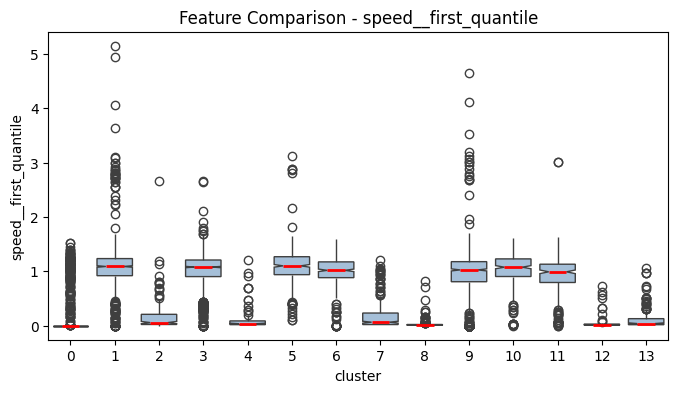

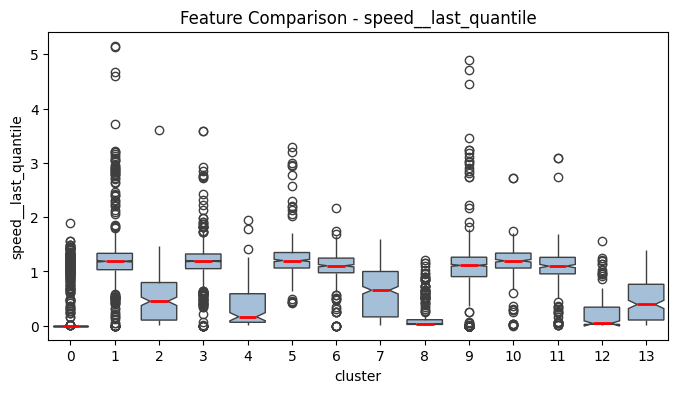

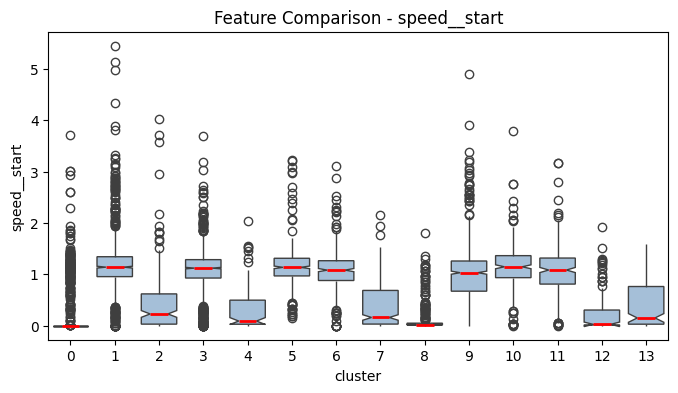

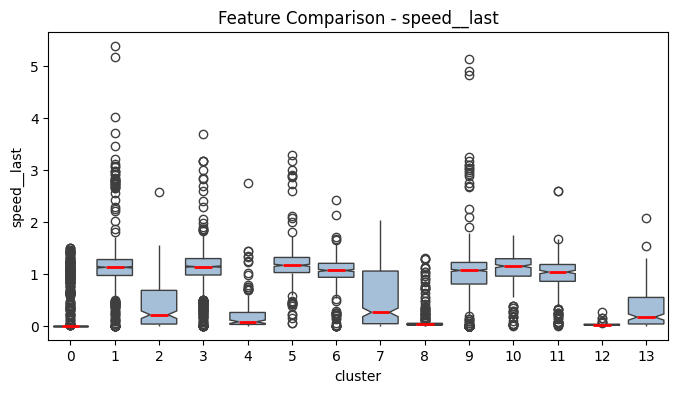

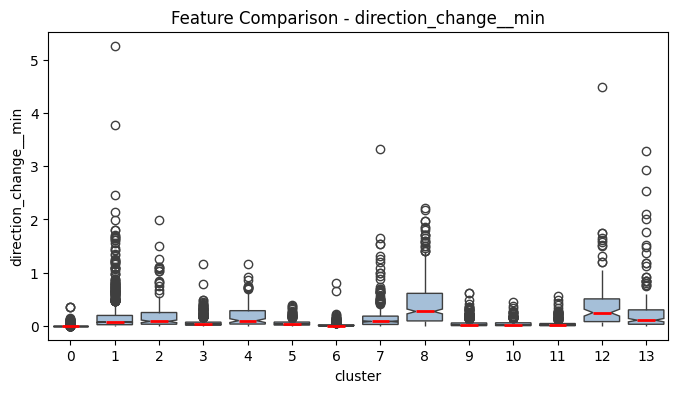

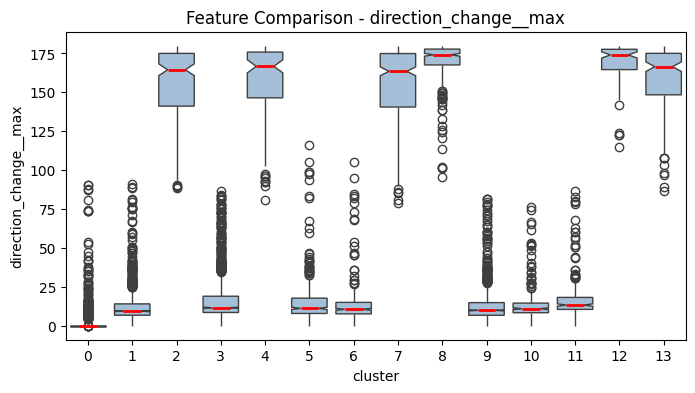

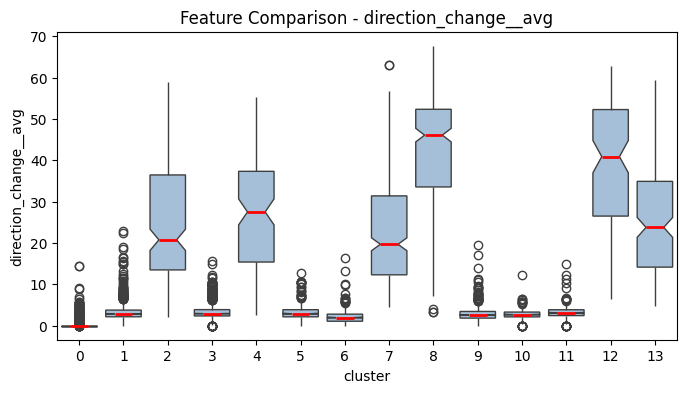

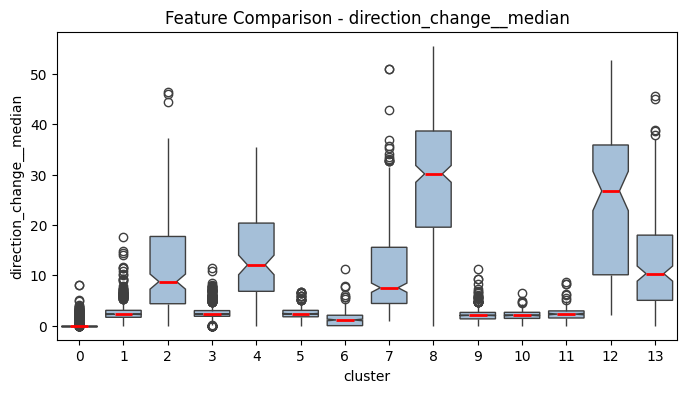

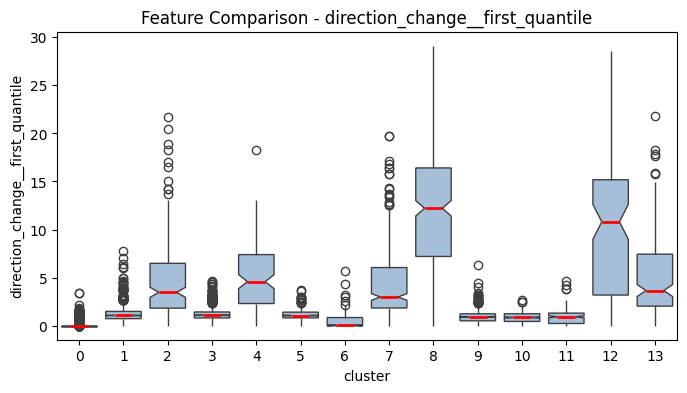

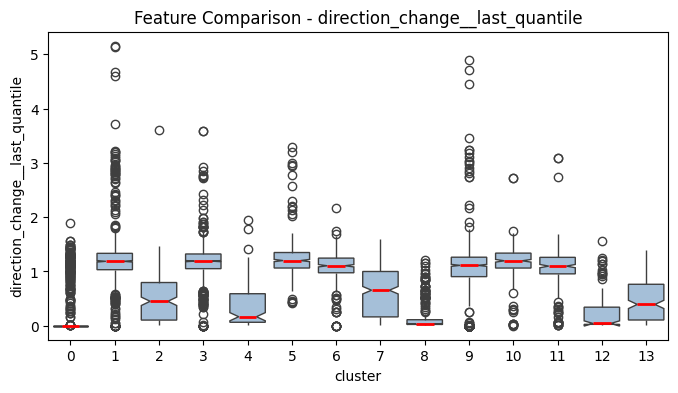

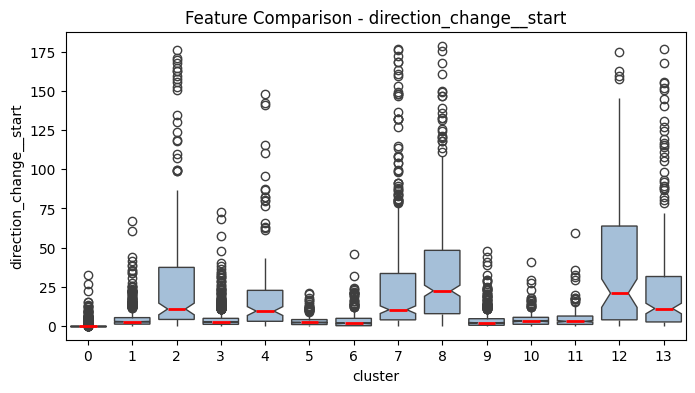

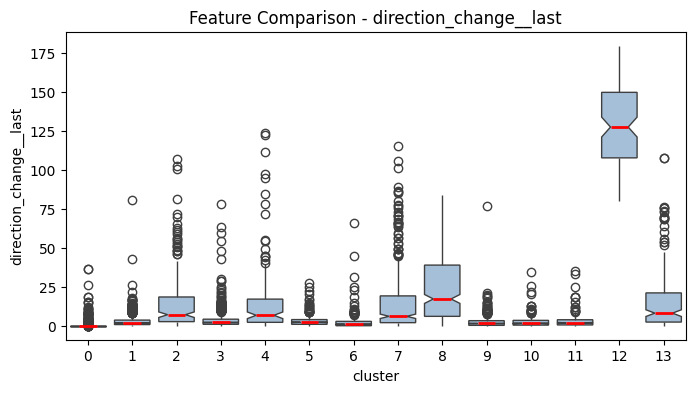

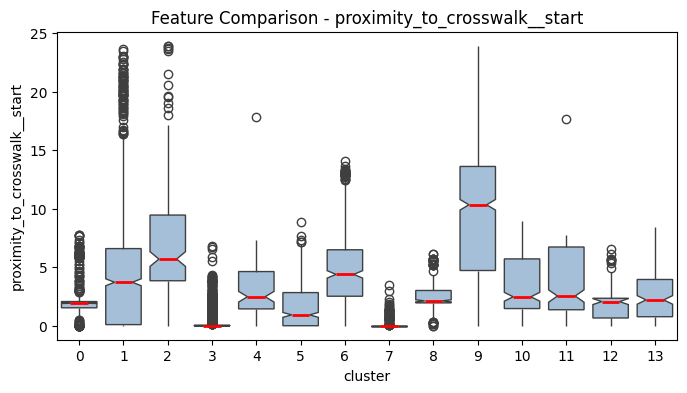

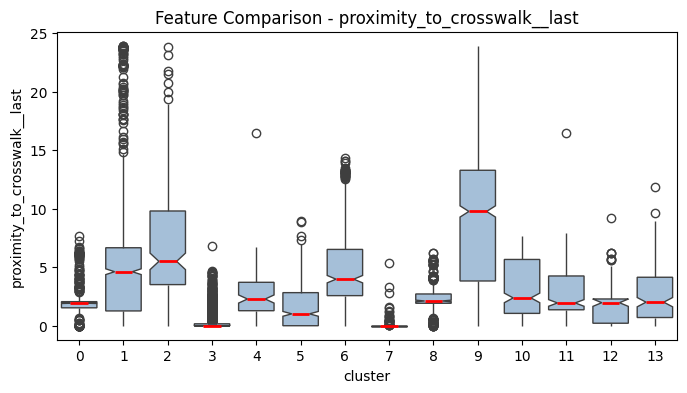

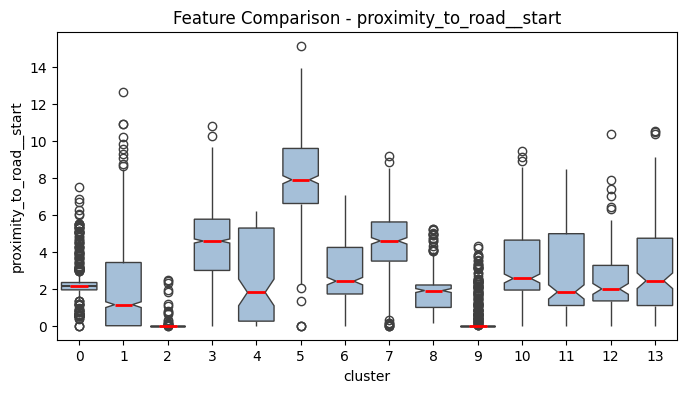

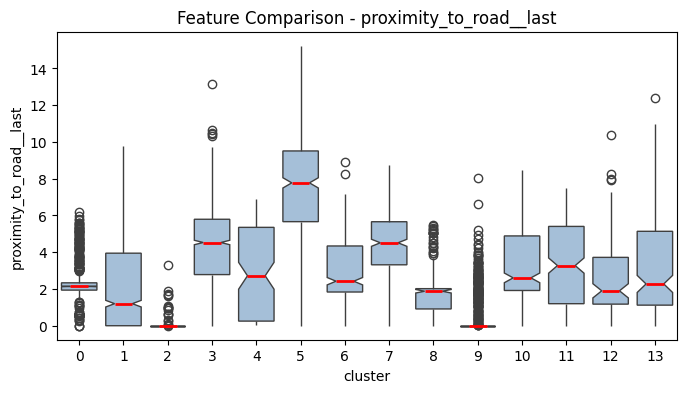

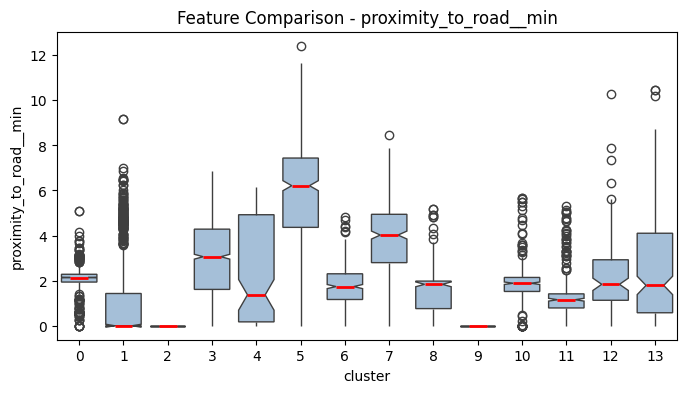

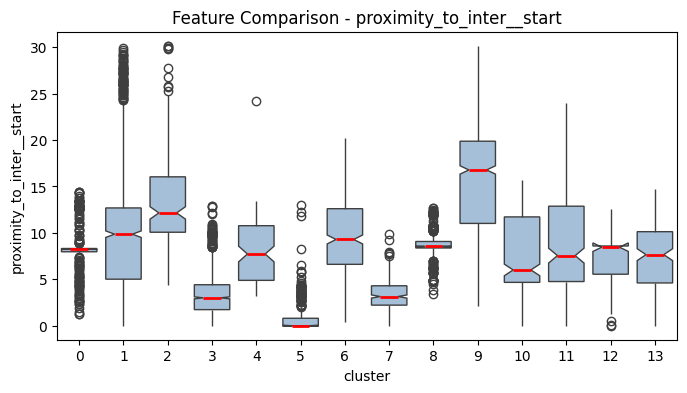

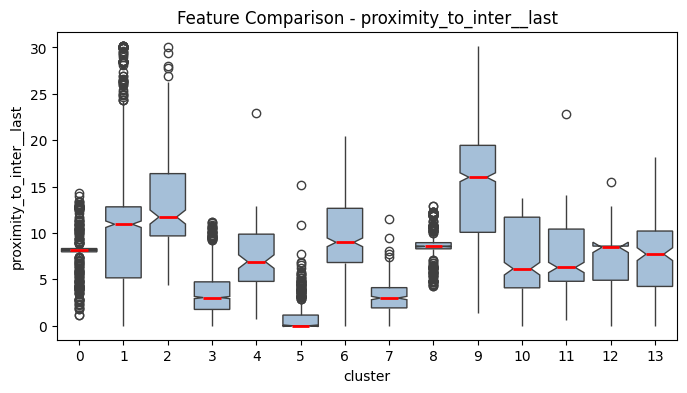

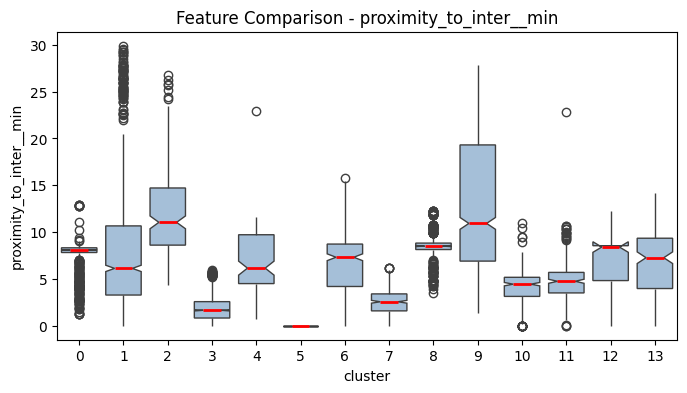

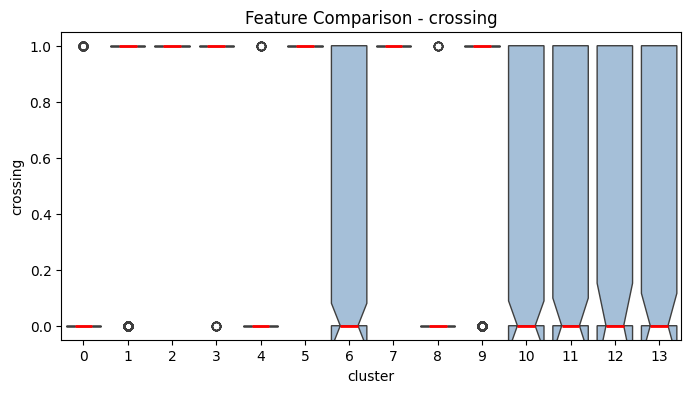

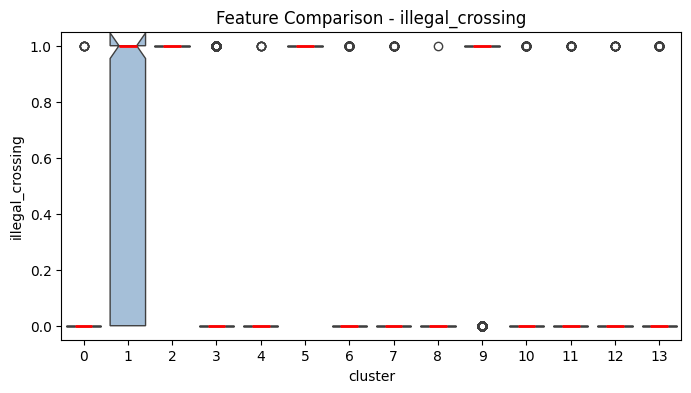

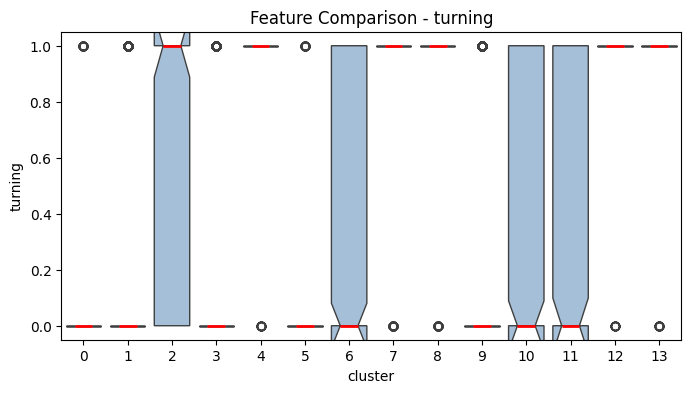

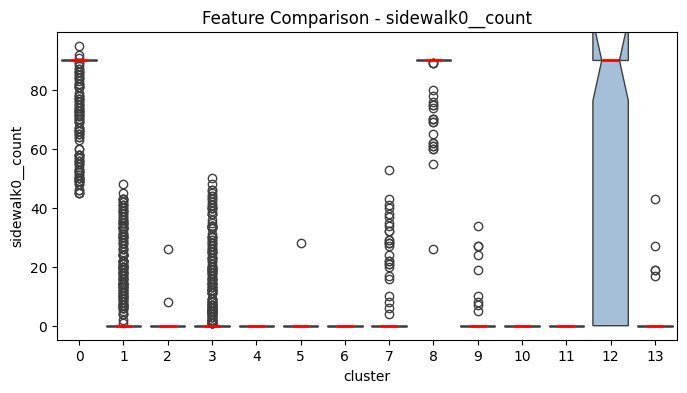

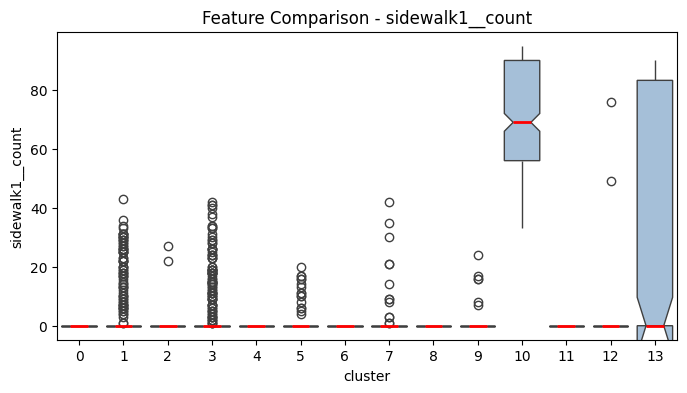

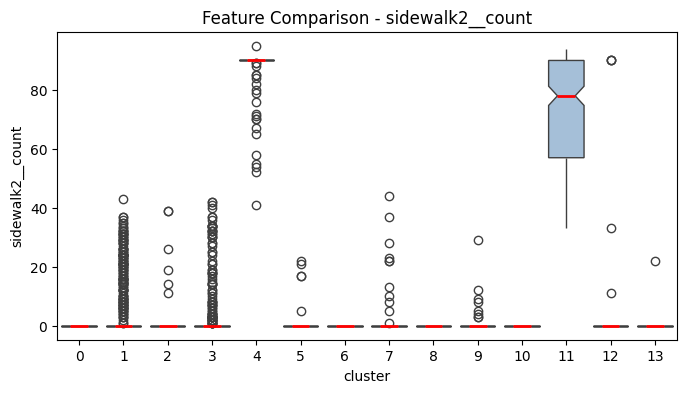

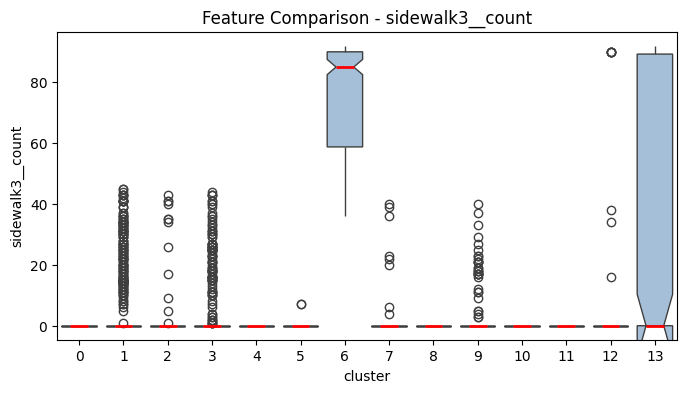

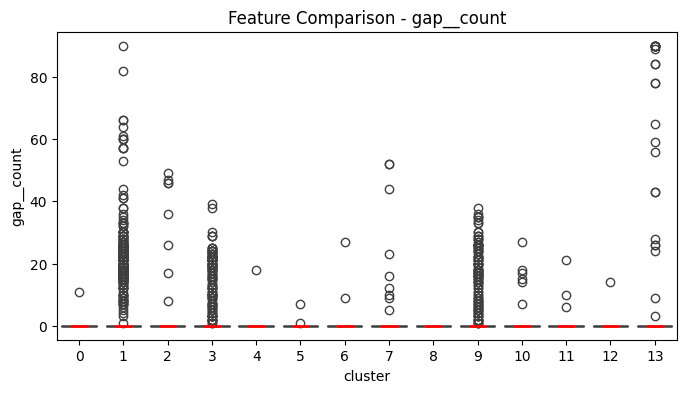

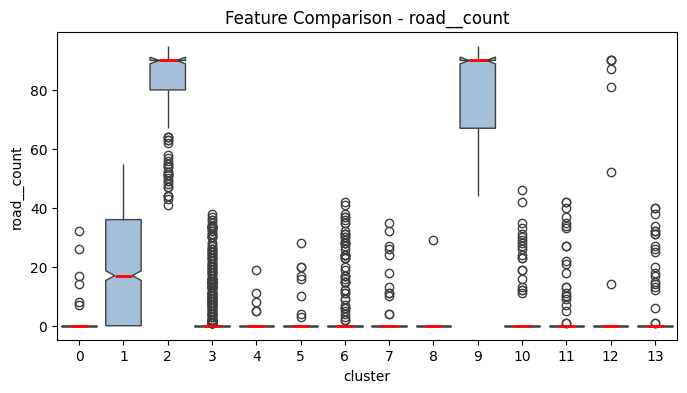

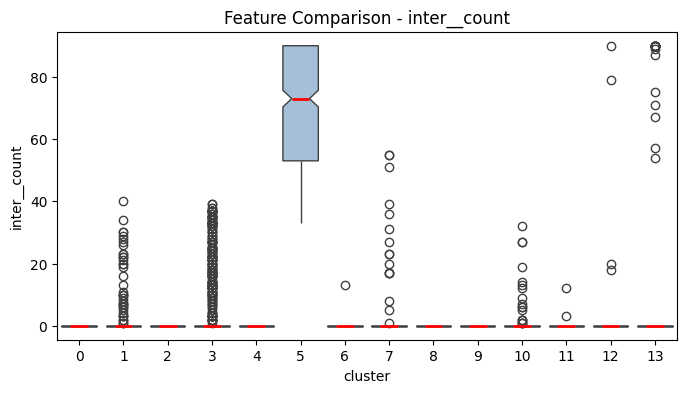

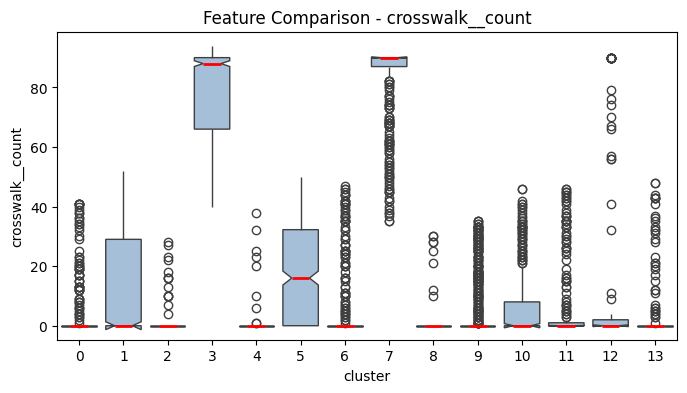

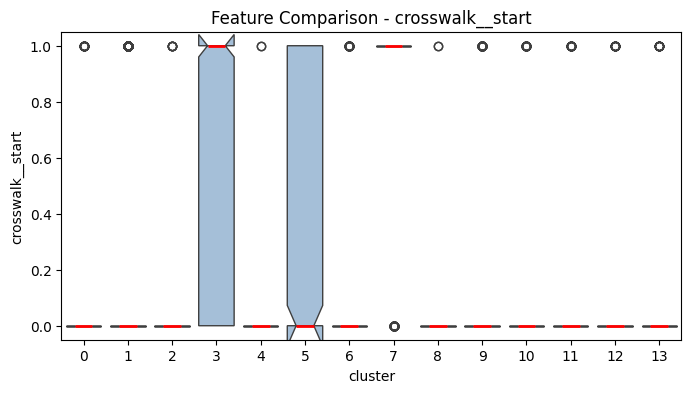

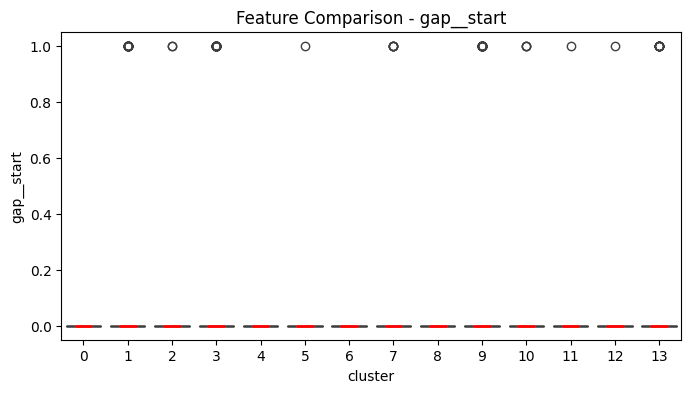

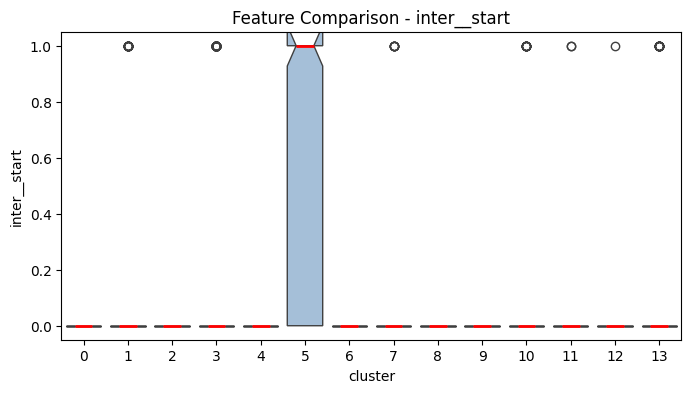

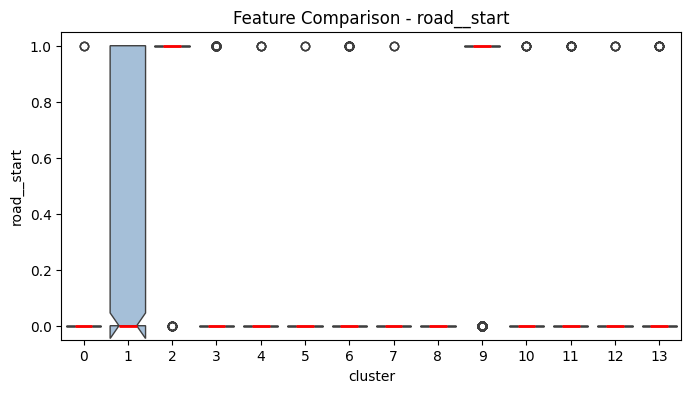

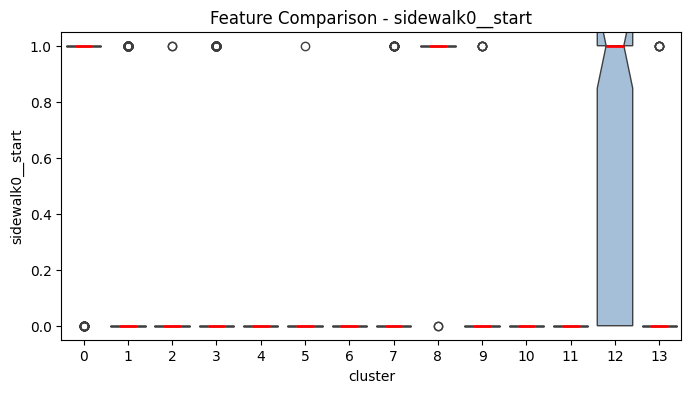

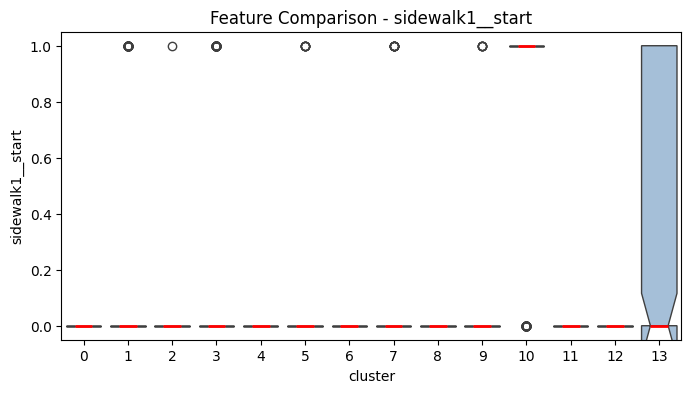

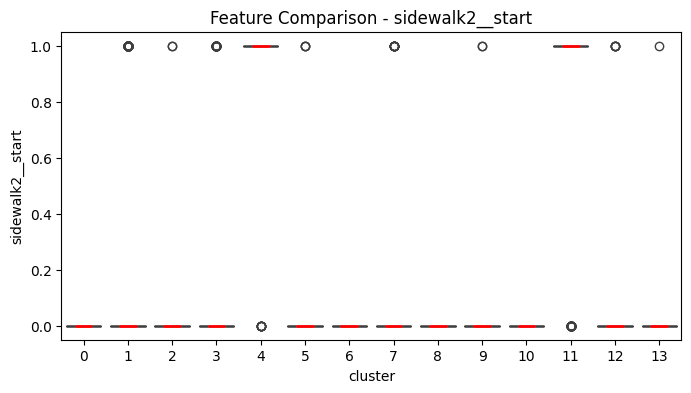

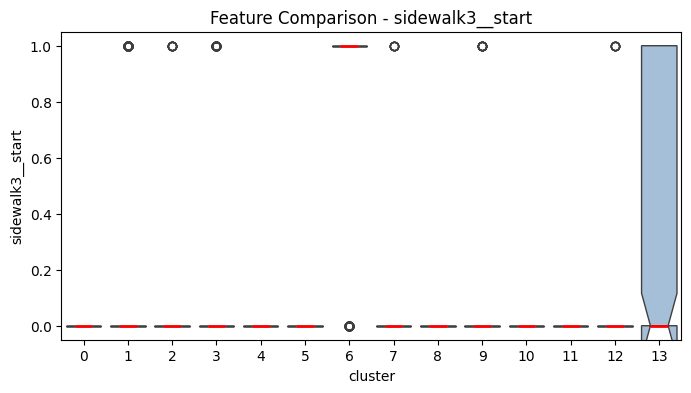

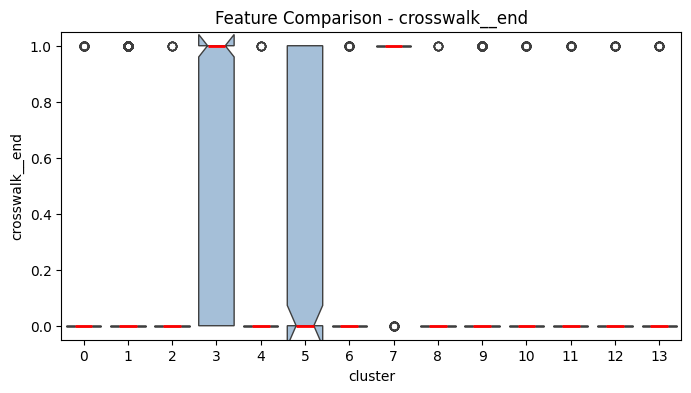

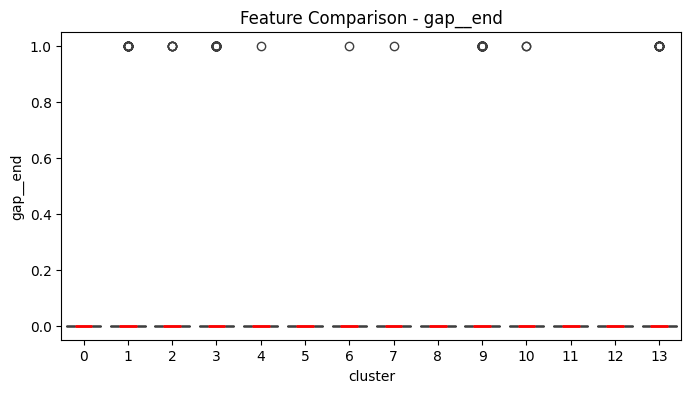

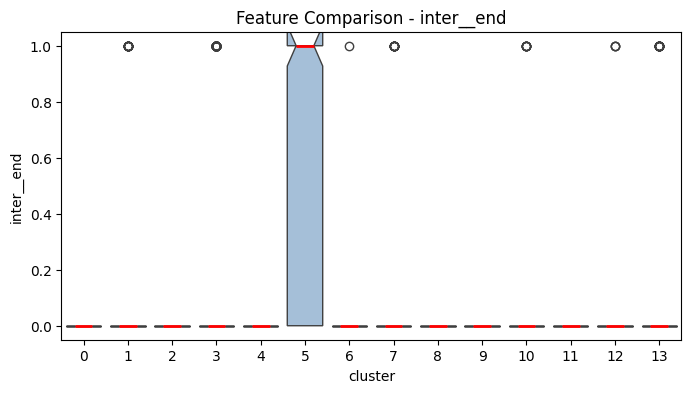

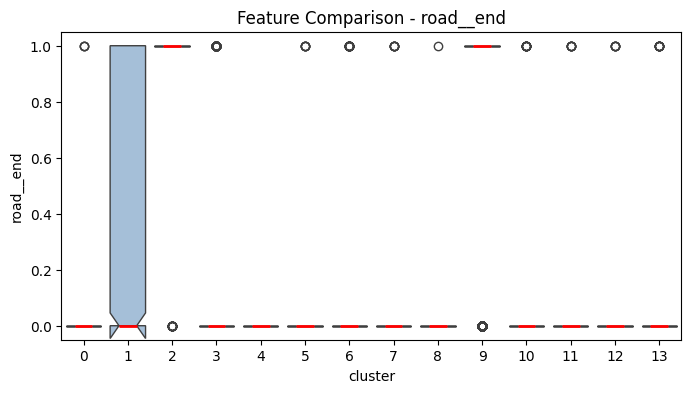

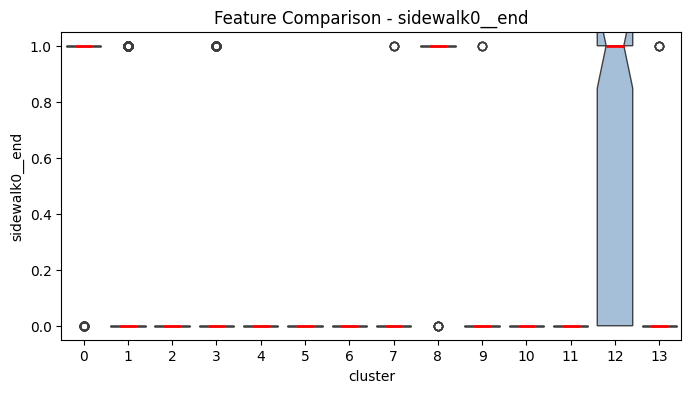

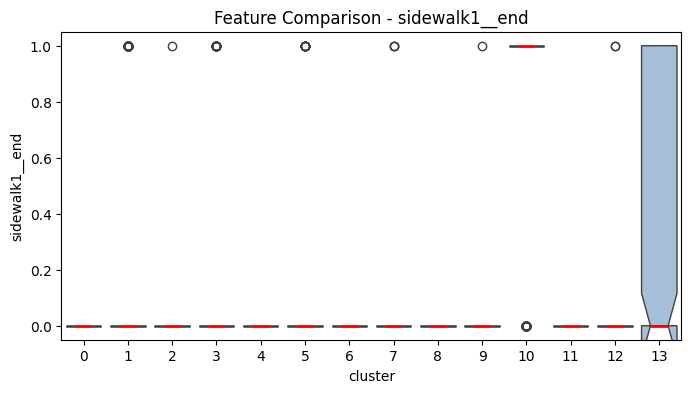

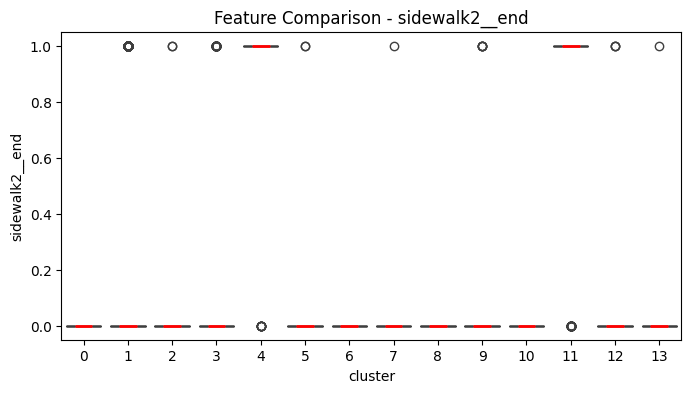

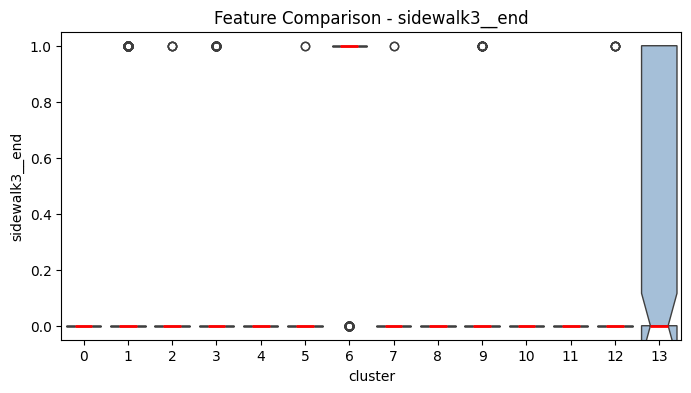

In [95]:
import seaborn as sns

for column in df.columns[:-1]:  # Exclude the cluster label
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=column, data=df, 
                # color=".8", linecolor="#137", linewidth=.75
                notch=True, showcaps=False,
                boxprops={"facecolor": (.3, .5, .7, .5)},
                medianprops={"color": "r", "linewidth": 2},)
    plt.title(f"Feature Comparison - {column}")
    plt.show()

##### PCA After Clustering

In [96]:
pca = PCA(n_components=3)  # Reducing to 3 dimensions as an example
principal_components = pca.fit_transform(df)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster'] = df['cluster']  # Add cluster labels to this new DataFrame

In [97]:
len(COLOR_PALETE)

9

In [98]:
n_clusters

14

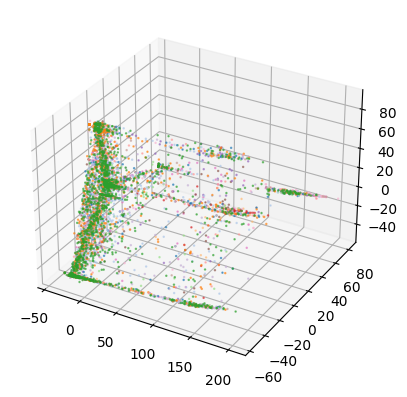

In [99]:
# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extracting the cluster names and colors
clusters = df_pca['cluster'].unique()
colors = COLOR_PALETE if n_clusters <= len(COLOR_PALETE) else sns.color_palette('tab20', len(clusters))  # Tab20 colormap with 20 unique colors

for cluster, color in zip(clusters, colors):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], s=.6, alpha=0.6, label=f'Cluster {cluster}', color=color)


/tmp/ipykernel_21968/455174604.py:4: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette=colors, s=20)


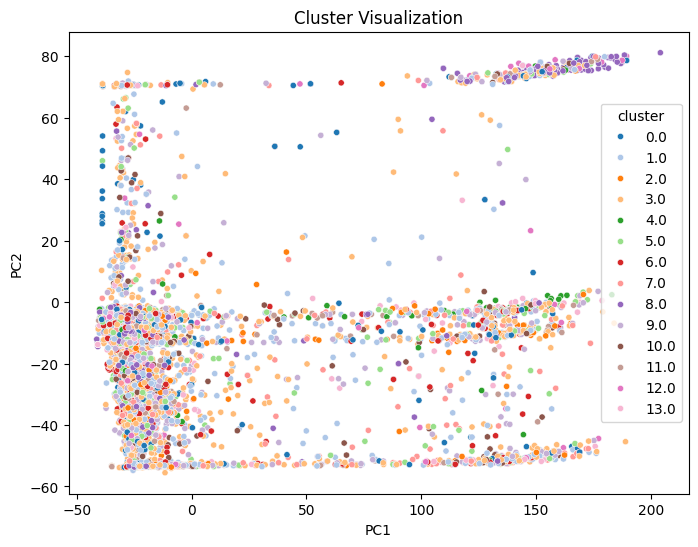

In [100]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette=colors, s=20)
plt.title('Cluster Visualization')
plt.show()

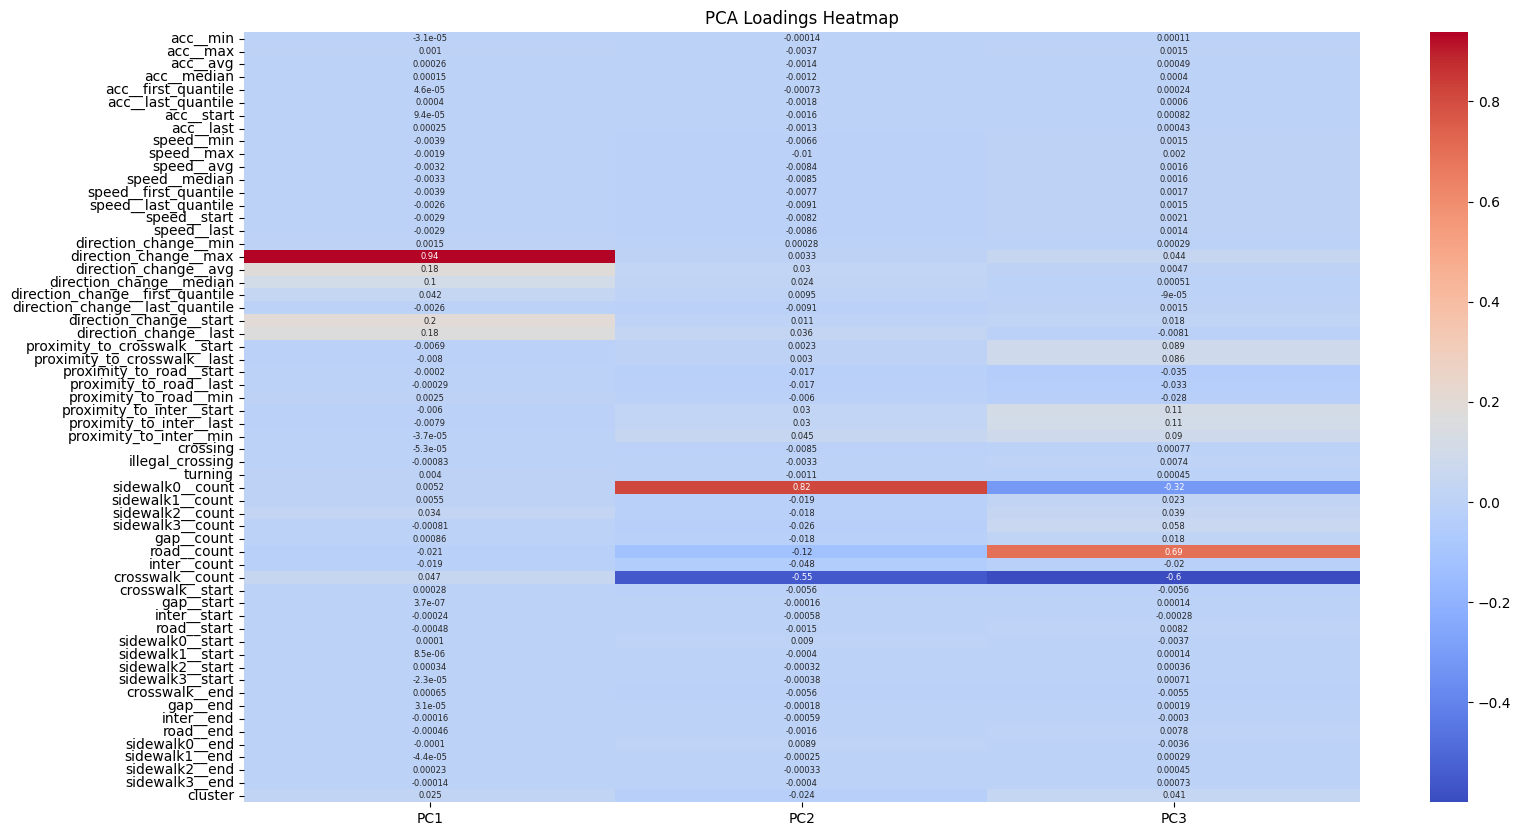

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'pca' is your fitted PCA object and 'df' is your original DataFrame

# Get loadings
loadings = pca.components_

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', 
            yticklabels=df.columns, xticklabels=[f'PC{i+1}' for i in range(len(loadings))], annot_kws={"size":6})
plt.title('PCA Loadings Heatmap')
plt.show()


/tmp/ipykernel_21968/2887147349.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=90, ha='right')


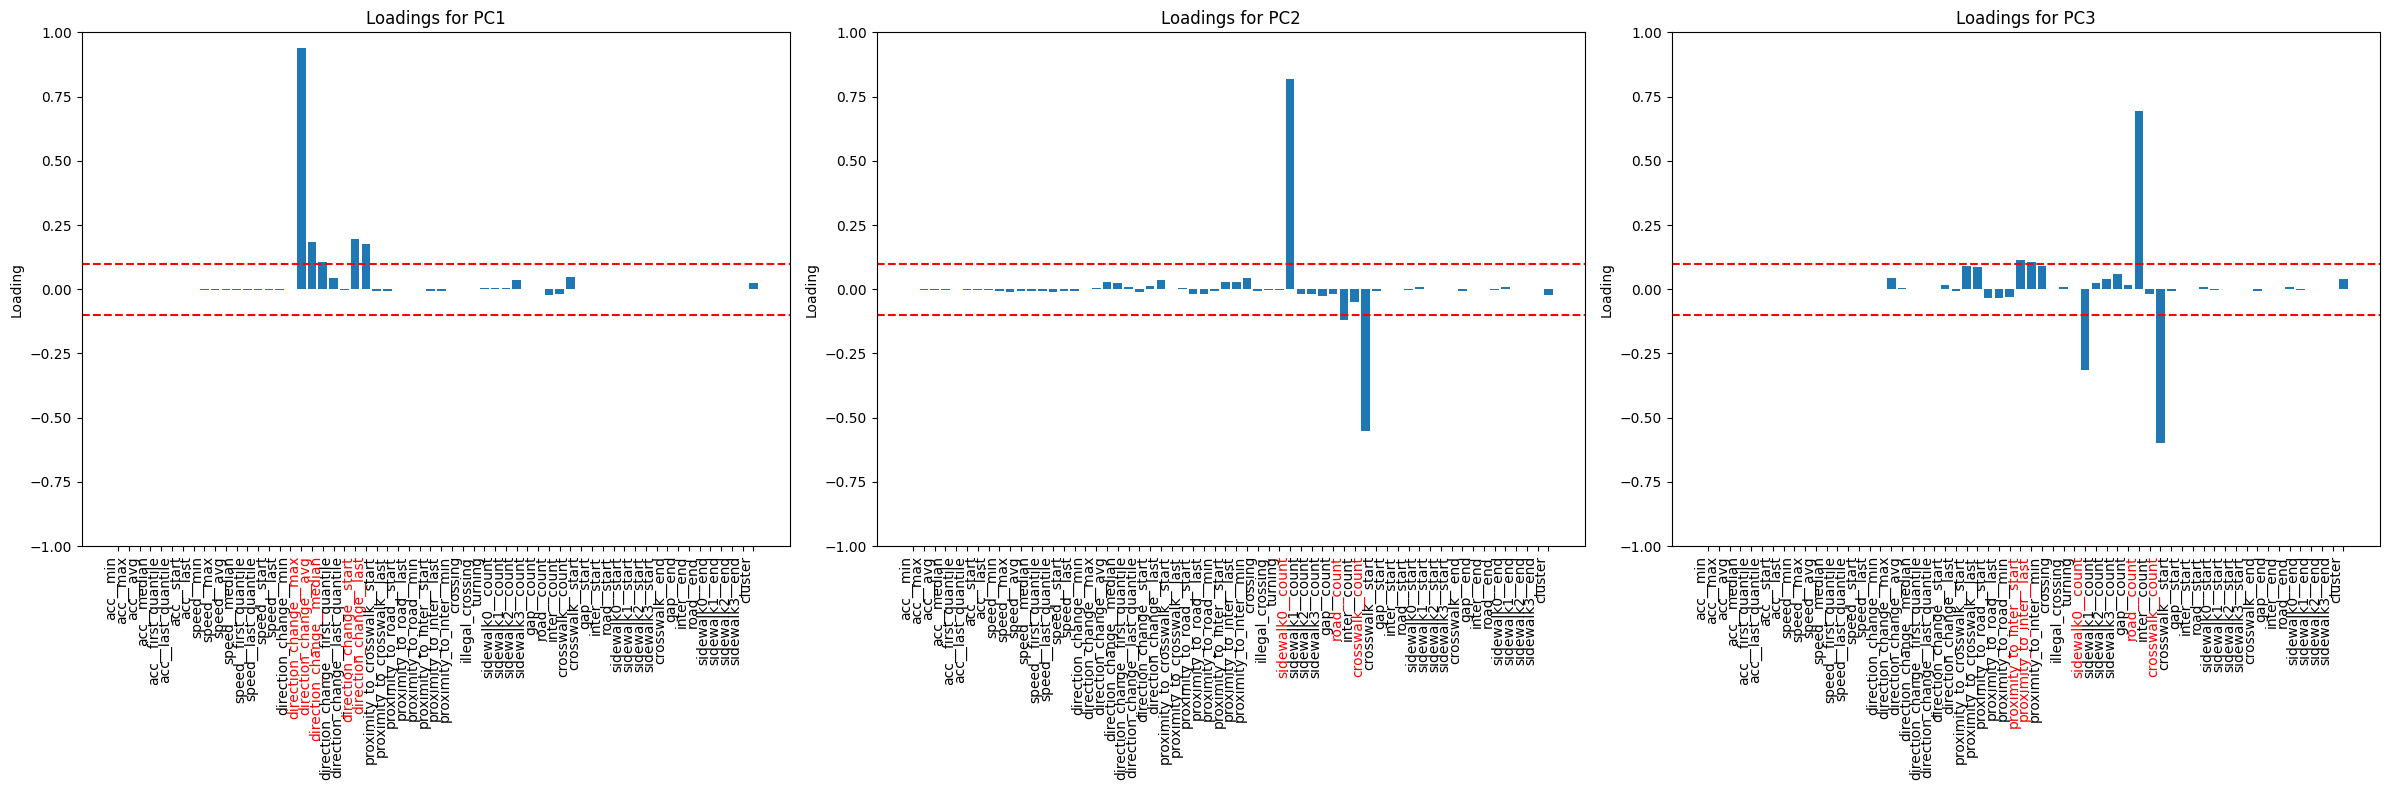

In [102]:
# Set the threshold for highlighting
threshold = 0.1

# Number of principal components
num_pcs = 3

plt.figure(figsize=(8*num_pcs, 8))

# Iterate through the first three PCs
for i in range(num_pcs):
    ax = plt.subplot(1, num_pcs, i+1)
    bars = ax.bar(df.columns, loadings[i, :])
    
    # Color feature names red if the bar is above 0.2
    for bar, label in zip(bars, ax.get_xticklabels()):
        label.set_color('red' if abs(bar.get_height()) > threshold else 'black')

     # Add a red horizontal line at the threshold
    ax.axhline(y=threshold, color='red', linestyle='--')
    ax.axhline(y=-threshold, color='red', linestyle='--')  # For negative values

    ax.set_xticklabels(df.columns, rotation=90, ha='right')
    ax.set_ylim((-1, 1))
    plt.ylabel('Loading')
    plt.title(f'Loadings for PC{i+1}')

plt.tight_layout()
plt.show()

/tmp/ipykernel_21968/3405095845.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns, ha='right')


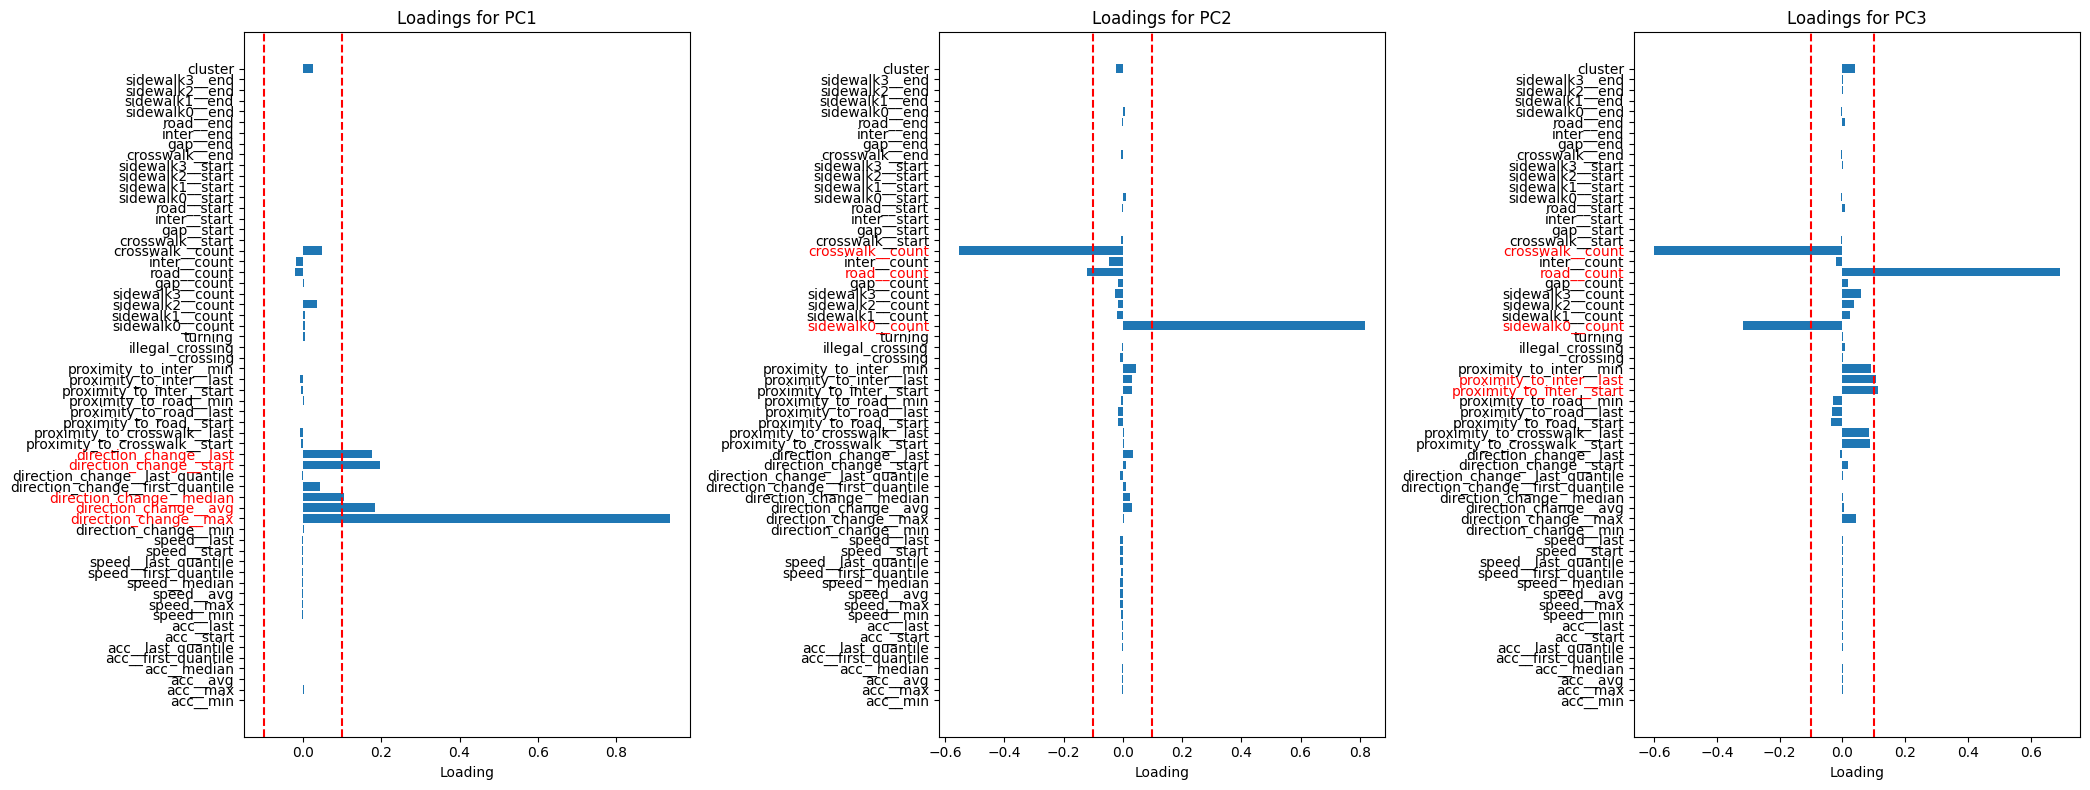

In [103]:
# Set the threshold for highlighting
threshold = 0.1

# Number of principal components
num_pcs = 3

plt.figure(figsize=(num_pcs*7, 8))

# Iterate through the first three PCs
for i in range(num_pcs):
    ax = plt.subplot(1, num_pcs, i+1)
    bars = ax.barh(df.columns, loadings[i, :])
    
    # Color feature names red if the bar is above 0.2
    # Color feature names red if the bar is above 0.2 and adjust x-tick labels
    for bar, label in zip(bars, ax.get_yticklabels()):
        label.set_color('red' if abs(bar.get_width()) > threshold else 'black')


     # Add a red horizontal line at the threshold
    ax.axvline(x=threshold, color='red', linestyle='--')
    ax.axvline(x=-threshold, color='red', linestyle='--')  # For negative values
    
    ax.set_yticklabels(df.columns, ha='right')

    plt.xlabel('Loading')
    plt.title(f'Loadings for PC{i+1}')

plt.tight_layout()
plt.show()